# Latar Belakang

Di era digital seperti saat ini, **Supermarket** harus melakukan berbagai cara untuk menarik lebih banyak pelanggan. Salah satu cara yang dilakukan adalah menggunakan berbagai saluran *(channel)* penjualan. Setiap saluran menawarkan pengalaman belanja yang berbeda dan dapat memengaruhi keputusan pembelian pelanggan. Perusahaan perlu memahami dengan baik bagaimana pelanggan berinteraksi dengan setiap saluran penjualan untuk memaksimalkan pengalaman pelanggan, meningkatkan penjualan, dan mengoptimalkan sumber daya yang digunakan pada setiap saluran.

Berdasarkan dataset yang dimiliki sebuah Supermarket di **Amerika Serikat**, terdapat informasi mengenai pembelian pelanggan melalui beberapa *channel*, yaitu penjualan melalui **website**, **katalog**, dan **toko fisik**. Selain itu, **data kunjungan situs web** juga dapat memberikan gambaran tentang intensitas penggunaan *online channel*, serta **data demografi pelanggan**, **data pembelian produk**, dan **data promosi yang sudah dilakukan** untuk menentukan strategi pemasaran yang sesuai dengan segmentasi pelanggan.



## Pernyataan Masalah

Supermarket ingin mengoptimalkan strategi penjualannya di berbagai *channel* (toko fisik, website, dan katalog). Namun, saat ini belum ada pemahaman yang mendalam mengenai:

1. **Preferensi pelanggan terhadap *channel* penjualan:** *Channel* mana yang paling banyak digunakan oleh pelanggan untuk melakukan pembelian? Apakah ada kelompok pelanggan yang lebih cenderung menggunakan channel tertentu (misalnya, pelanggan dengan usia, tingkat pendidikan, atau pendapatan tertentu)?

2. **Kontribusi setiap *channel* terhadap penjualan keseluruhan:** Seberapa besar kontribusi masing-masing channel terhadap total penjualan? Apakah ada channel yang secara signifikan memberikan lebih banyak penjualan daripada yang lain?

3. **Frekuensi interaksi dengan *online channel*:** Seberapa sering pelanggan mengunjungi situs web dalam sebulan, dan bagaimana kunjungan ini berkorelasi dengan pembelian melalui website? Apakah ada gap antara kunjungan dan transaksi yang dilakukan?

4. **Pengoptimalan *channel* yang kurang efektif**: Apakah ada *channel* yang kurang diminati oleh pelanggan? Jika ada, bagaimana cara meningkatkan minat pelanggan terhadap *channel* tersebut?

# Data

##### **Library yang Digunakan**

In [246]:
import pandas as pd
import numpy as np
import seaborn as sns

import matplotlib.pyplot as plt
import datetime

import warnings
warnings.filterwarnings("ignore")

##### **Dataset yang Digunakan**

Dataset yang digunakan pada analisis kali ini dapat diakses pada [link](https://drive.google.com/drive/folders/1WodnBbuYTvsF0-6HTuQABQ0KCS31lqbK) berikut.

In [247]:
# Memuat data
df = pd.read_csv('Supermarket Customers.csv', delimiter='\t')

In [248]:
# Melihat data secara keseluruhan
df

,ID,Year_Birth,Education,Marital_Status,Income,Kidhome,Teenhome,Dt_Customer,Recency,MntWines,...,NumWebVisitsMonth,AcceptedCmp3,AcceptedCmp4,AcceptedCmp5,AcceptedCmp1,AcceptedCmp2,Complain,Z_CostContact,Z_Revenue,Response
0,5524,1957,Graduation,Single,58138.0,0,0,04-09-2012,58,635,...,7,0,0,0,0,0,0,3,11,1
1,2174,1954,Graduation,Single,46344.0,1,1,08-03-2014,38,11,...,5,0,0,0,0,0,0,3,11,0
2,4141,1965,Graduation,Together,71613.0,0,0,21-08-2013,26,426,...,4,0,0,0,0,0,0,3,11,0
3,6182,1984,Graduation,Together,26646.0,1,0,10-02-2014,26,11,...,6,0,0,0,0,0,0,3,11,0
4,5324,1981,PhD,Married,58293.0,1,0,19-01-2014,94,173,...,5,0,0,0,0,0,0,3,11,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2235,10870,1967,Graduation,Married,61223.0,0,1,13-06-2013,46,709,...,5,0,0,0,0,0,0,3,11,0
2236,4001,1946,PhD,Together,64014.0,2,1,10-06-2014,56,406,...,7,0,0,0,1,0,0,3,11,0
2237,7270,1981,Graduation,Divorced,56981.0,0,0,25-01-2014,91,908,...,6,0,1,0,0,0,0,3,11,0
2238,8235,1956,Master,Together,69245.0,0,1,24-01-2014,8,428,...,3,0,0,0,0,0,0,3,11,0


Dataset ini berisi informasi terkait demografis pelanggan, produk yang dibeli, promosi yang diambil, serta kanal pembelian yang dipilih oleh pelanggan di Supermarket.

Berikut adalah penjelasan mengenai variabel yang terdapat dalam kolom dataset Supermarket Customers.

In [249]:
df.columns

Index(['ID', 'Year_Birth', 'Education', 'Marital_Status', 'Income', 'Kidhome',
       'Teenhome', 'Dt_Customer', 'Recency', 'MntWines', 'MntFruits',
       'MntMeatProducts', 'MntFishProducts', 'MntSweetProducts',
       'MntGoldProds', 'NumDealsPurchases', 'NumWebPurchases',
       'NumCatalogPurchases', 'NumStorePurchases', 'NumWebVisitsMonth',
       'AcceptedCmp3', 'AcceptedCmp4', 'AcceptedCmp5', 'AcceptedCmp1',
       'AcceptedCmp2', 'Complain', 'Z_CostContact', 'Z_Revenue', 'Response'],
      dtype='object')

| **Kategori**   | **Nama Variabel**        | **Deskripsi**                                                                  |
|----------------|--------------------------|--------------------------------------------------------------------------------|
| **Pelanggan**  | ID                       | Identifikasi unik pelanggan                                                    |
|                | Year_Birth               | Tahun lahir pelanggan                                                          |
|                | Education                | Status pendidikan terakhir pelanggan                                          |
|                | Marital_Status           | Status pernikahan pelanggan                                                    |
|                | Income                   | Pendapatan rumah tangga tahunan pelanggan                                      |
|                | Kidhome                  | Jumlah anak dalam rumah tangga pelanggan                                       |
|                | Teenhome                 | Jumlah remaja dalam rumah tangga pelanggan                                     |
|                | Dt_Customer              | Tanggal pendaftaran pelanggan dengan supermarket                               |
|                | Recency                  | Jumlah hari sejak pembelian terakhir pelanggan                                 |
|                | Complain                 | 1 jika pelanggan pernah mengajukan keluhan dalam 2 tahun terakhir, 0 jika tidak|
| **Produk**     | MntWines                 | Jumlah yang dibelanjakan untuk wine dalam 2 tahun terakhir                     |
|                | MntFruits                | Jumlah yang dibelanjakan untuk buah dalam 2 tahun terakhir                     |
|                | MntMeatProducts          | Jumlah yang dibelanjakan untuk daging dalam 2 tahun terakhir                   |
|                | MntFishProducts          | Jumlah yang dibelanjakan untuk ikan dalam 2 tahun terakhir                     |
|                | MntSweetProducts         | Jumlah yang dibelanjakan untuk manisan dalam 2 tahun terakhir                  |
|                | MntGoldProds             | Jumlah yang dibelanjakan untuk emas dalam 2 tahun terakhir                     |
| **Promosi**    | AcceptedCmp1             | 1 jika pelanggan menerima tawaran di kampanye 1, 0 jika tidak                  |
|                | AcceptedCmp2             | 1 jika pelanggan menerima tawaran di kampanye 2, 0 jika tidak                  |
|                | AcceptedCmp3             | 1 jika pelanggan menerima tawaran di kampanye 3, 0 jika tidak                  |
|                | AcceptedCmp4             | 1 jika pelanggan menerima tawaran di kampanye 4, 0 jika tidak                  |
|                | AcceptedCmp5             | 1 jika pelanggan menerima tawaran di kampanye 5, 0 jika tidak                  |
|                | Response                 | 1 jika pelanggan menerima tawaran di kampanye terakhir, 0 jika tidak           |
|                | NumDealsPurchases        | Jumlah pembelian yang dilakukan dengan diskon                                  |
| **Kanal**      | NumWebPurchases          | Jumlah pembelian yang dilakukan melalui website supermarket                    |
|                | NumCatalogPurchases      | Jumlah pembelian yang dilakukan melalui katalog supermarket                    |
|                | NumStorePurchases        | Jumlah pembelian yang dilakukan langsung di supermarket                        |
|                | NumWebVisitsMonth        | Jumlah kunjungan ke website supermarket dalam sebulan terakhir                 |
| **Lain-lain**  | Z_CostContact            | -                                                                              |
|                | Z_Revenue                | -                                                                              |


## Pemahaman dan Penanganan Data

In [250]:
print(f"Jumlah baris dalam dataset 'df' adalah {df.shape[0]}")
print(f"Jumlah kolom dalam dataset 'df' adalah {df.shape[1]}")

Jumlah baris dalam dataset 'df' adalah 2240
Jumlah kolom dalam dataset 'df' adalah 29


Berikut merupakan informasi terkait jumlah dan tipe data dari tiap kolom dalam dataset Supermarket Customers.

In [251]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2240 entries, 0 to 2239
Data columns (total 29 columns):
 #   Column               Non-Null Count  Dtype  
---  ------               --------------  -----  
 0   ID                   2240 non-null   int64  
 1   Year_Birth           2240 non-null   int64  
 2   Education            2240 non-null   object 
 3   Marital_Status       2240 non-null   object 
 4   Income               2216 non-null   float64
 5   Kidhome              2240 non-null   int64  
 6   Teenhome             2240 non-null   int64  
 7   Dt_Customer          2240 non-null   object 
 8   Recency              2240 non-null   int64  
 9   MntWines             2240 non-null   int64  
 10  MntFruits            2240 non-null   int64  
 11  MntMeatProducts      2240 non-null   int64  
 12  MntFishProducts      2240 non-null   int64  
 13  MntSweetProducts     2240 non-null   int64  
 14  MntGoldProds         2240 non-null   int64  
 15  NumDealsPurchases    2240 non-null   i

In [252]:
# Periksa nilai unik di setiap kolom
pd.set_option('display.max_colwidth', None)

listItem = []
for col in df.columns :
    listItem.append( [col, df[col].nunique(), df[col].unique()])

tabel1Desc = pd.DataFrame(columns=['Column Name', 'Number of Unique', 'Unique Sample'],
                     data=listItem)
tabel1Desc

,Column Name,Number of Unique,Unique Sample
0,ID,2240,"[5524, 2174, 4141, 6182, 5324, 7446, 965, 6177, 4855, 5899, 1994, 387, 2125, 8180, 2569, 2114, 9736, 4939, 6565, 2278, 9360, 5376, 1993, 4047, 1409, 7892, 2404, 5255, 9422, 1966, 6864, 3033, 5710, 7373, 8755, 10738, 4339, 10755, 8595, 2968, 8601, 503, 8430, 7281, 2139, 1371, 9909, 7286, 7244, 6566, 8614, 4114, 1331, 2225, 9381, 6260, 10383, 7437, 8557, 8375, 6853, 3076, 1012, 6518, 4137, 8082, 1386, 9369, 4477, 1357, 1402, 10629, 6312, 8132, 1050, 5846, 1859, 7503, 10401, 1618, 3332, 2261, 5346, 4119, 535, 5268, 273, 4452, 8504, 771, 8996, 9235, 5798, 11178, 2230, 7516, 7247, 11100, 4646, 3037, ...]"
1,Year_Birth,59,"[1957, 1954, 1965, 1984, 1981, 1967, 1971, 1985, 1974, 1950, 1983, 1976, 1959, 1952, 1987, 1946, 1980, 1949, 1982, 1979, 1951, 1969, 1986, 1989, 1963, 1970, 1973, 1943, 1975, 1996, 1968, 1964, 1977, 1978, 1955, 1966, 1988, 1948, 1958, 1972, 1960, 1945, 1991, 1962, 1953, 1961, 1956, 1992, 1900, 1893, 1990, 1947, 1899, 1993, 1994, 1941, 1944, 1995, 1940]"
2,Education,5,"[Graduation, PhD, Master, Basic, 2n Cycle]"
3,Marital_Status,8,"[Single, Together, Married, Divorced, Widow, Alone, Absurd, YOLO]"
4,Income,1974,"[58138.0, 46344.0, 71613.0, 26646.0, 58293.0, 62513.0, 55635.0, 33454.0, 30351.0, 5648.0, nan, 7500.0, 63033.0, 59354.0, 17323.0, 82800.0, 41850.0, 37760.0, 76995.0, 33812.0, 37040.0, 2447.0, 58607.0, 65324.0, 40689.0, 18589.0, 53359.0, 38360.0, 84618.0, 10979.0, 38620.0, 40548.0, 46610.0, 68657.0, 49389.0, 67353.0, 23718.0, 42429.0, 48948.0, 80011.0, 20559.0, 21994.0, 79941.0, 41728.0, 72550.0, 65486.0, 79143.0, 35790.0, 82582.0, 66373.0, 82384.0, 70287.0, 27938.0, 55954.0, 75777.0, 66653.0, 61823.0, 67680.0, 70666.0, 25721.0, 32474.0, 88194.0, 69096.0, 74854.0, 66991.0, 65031.0, 60631.0, 28332.0, 40246.0, 75251.0, 75825.0, 26326.0, 56046.0, 29760.0, 26304.0, 23559.0, 81361.0, 29440.0, 36138.0, 50388.0, 79593.0, 54178.0, 42394.0, 23626.0, 30096.0, 47916.0, 51813.0, 78497.0, 50150.0, 47823.0, 34554.0, 85693.0, 65846.0, 87195.0, 24594.0, 49096.0, 52413.0, 38557.0, 89058.0, 77298.0, ...]"
5,Kidhome,3,"[0, 1, 2]"
6,Teenhome,3,"[0, 1, 2]"
7,Dt_Customer,663,"[04-09-2012, 08-03-2014, 21-08-2013, 10-02-2014, 19-01-2014, 09-09-2013, 13-11-2012, 08-05-2013, 06-06-2013, 13-03-2014, 15-11-2013, 10-10-2012, 24-11-2012, 24-12-2012, 31-08-2012, 28-03-2013, 03-11-2012, 08-08-2012, 06-01-2013, 23-12-2012, 11-01-2014, 18-03-2013, 02-01-2013, 27-05-2013, 20-02-2013, 31-05-2013, 22-11-2013, 22-05-2014, 11-05-2013, 29-10-2012, 29-08-2013, 31-12-2013, 02-09-2013, 11-02-2014, 01-02-2013, 29-04-2013, 12-03-2013, 05-11-2013, 02-10-2013, 28-06-2014, 09-11-2012, 24-05-2013, 01-01-2014, 08-11-2012, 12-05-2014, 11-08-2012, 07-06-2014, 12-06-2013, 19-11-2012, 02-04-2013, 28-04-2014, 17-06-2013, 03-03-2014, 04-07-2013, 07-09-2012, 18-02-2013, 11-06-2013, 06-12-2013, 21-05-2013, 11-05-2014, 19-03-2014, 27-09-2013, 08-04-2013, 11-09-2012, 14-09-2012, 17-03-2013, 05-04-2013, 30-04-2014, 19-12-2012, 27-08-2012, 12-10-2012, 04-09-2013, 29-08-2012, 23-06-2013, 03-07-2013, 25-02-2014, 11-08-2013, 16-07-2013, 28-05-2014, 21-01-2014, 27-05-2014, 23-11-2013, 23-03-2014, 24-05-2014, 22-11-2012, 11-04-2013, 01-12-2013, 20-06-2013, 23-07-2013, 30-03-2014, 20-04-2013, 17-05-2013, 08-05-2014, 10-12-2013, 24-09-2013, 02-02-2013, 07-12-2012, 02-11-2013, 10-11-2012, 25-06-2014, ...]"
8,Recency,100,"[58, 38, 26, 94, 16, 34, 32, 19, 68, 11, 59, 82, 53, 23, 51, 20, 91, 86, 41, 42, 63, 0, 69, 89, 4, 96, 56, 31, 8, 55, 37, 76, 99, 3, 88, 80, 72, 24, 92, 39, 29, 2, 54, 57, 30, 12, 18, 75, 90, 1, 25, 40, 9, 87, 5, 95, 48, 70, 79, 45, 84, 44, 43, 35, 15, 17, 46, 27, 74, 85, 65, 13, 83, 10, 21, 61, 73, 47, 36, 49, 28, 64, 98, 78, 77, 81, 14, 52, 93, 50, 60, 66, 97, 62, 6, 33, 67, 22, 71, 7]"
9,MntWines,776,"[635, 11, 426, 173, 520, 235, 76, 14, 28, 5, 6, 194, 233, 3, 1006, 53, 84, 1012, 4, 86, 1, 867, 384, 270, 36, 684, 8, 112, 110, 96, 482, 40, 702, 55, 437, 421, 13, 9, 81, 123, 48, 826, 245, 650, 12, 510, 3

Secara umum, kita bisa melihat bahwa:
* Dataset Supermarket Customers memiliki **2240 baris** dan **29 kolom**.
* Kolom `ID` berisikan **2240 nilai unik**, yang berarti tiap pelanggan memiliki id uniknya sendiri dan tidak ada nilai yang kosong atau duplikat.
* Kolom `Year_Birth` berisikan **59 nilai unik**, selanjutnya akan dilihat apakah ada nilai *outlier* yang perlu ditangani (Sebetulnya sudah terlihat ada 3 nilai tahun kelahiran yang tidak mungkin, yaitu 1893, 1899, dan 1900 yang bisa kita asumsikan pada data ini dibuat pelanggan tersebut sudah berusia lebih dari 100 tahun).
* Kolom `Education` berisikan **5 nilai unik**, yaitu tingkat pendidikan terakhir pelanggan (Graduation, PhD, Master, Basic, 2n Cycle).
* Kolom `Marital_Status` berisikan **8 nilai unik**, yaitu status pernikahan pelanggan (Single, Together, Married, Divorced, Widow, Alone, Absurd, YOLO).
* Kolom `Income` **memiliki data kosong**. Data kosong pada kolom tersebut diwakili dengan data NaN.
* Kolom `Kidhome` dan `Teenhome` berisikan **3 nilai unik**, yaitu 0,1,2 yang berarti pelanggan yang terdata memiliki anak/remaja berjumlah 1 (satu), 2 (dua), atau tidak sama sekali.
* Kolom `Dt_Customer` berisi tanggal pelanggan terdaftar pada supermarket. Kolom tersebut memiliki data tipe **'object'** yang akan kita ubah menjadi tipe **'datetime'** agar lebih memudahkan dalam analisis.
* Kolom `Recency` menunjukkan jumlah hari semenjak pelanggan melakukan pembelian terakhir. Diperlukan asumsi untuk menentukan **rentang waktu pengambilan data**.
* Kolom `MntWines`, `MntFruits`, `MntMeatProducts`, `MntFishProducts`, `MntSweetProducts`, dan `MntGoldProds` memiliki **jumlah nilai uniknya tersendiri** yang menunjukkan jumlah pembelian pelanggan pada tiap kategori produk dalam 2 (dua) tahun terakhir.
* Kolom `NumDealsPurchases`, `NumWebPurchases`, `NumCatalogPurchases`, `NumStorePurchases`, dan `NumWebVisitsMonth` **jumlah nilai uniknya tersendiri**.
* Kolom `AcceptedCmp3`, `AcceptedCmp4`, `AcceptedCmp5`, `AcceptedCmp1`, `AcceptedCmp2`, `Complain`, dan `Response` memiliki **2 nilai unik**, yaitu 0 dan 1 yang jika nilainya 0 (nol) menandakan pelanggan menolak, dan 1 (satu) menandakan pelanggan menerima.
* Kolom `Z_CostContact` memiliki **keseluruhan nilai yang sama**, yaitu 3 dan kolom `Z_Revenue` juga memiliki keseluruhan nilai yang sama, yaitu 11. Kolom-kolom tersebut tidak dapat digunakan dalam analisis sehingga bisa dihapus saja.

##### **Menangani Nilai yang Hilang *(Missing Value)* di Kolom `Income`**

In [253]:
# Cek missing value dalam data
df.isna().sum()

ID                      0
Year_Birth              0
Education               0
Marital_Status          0
Income                 24
Kidhome                 0
Teenhome                0
Dt_Customer             0
Recency                 0
MntWines                0
MntFruits               0
MntMeatProducts         0
MntFishProducts         0
MntSweetProducts        0
MntGoldProds            0
NumDealsPurchases       0
NumWebPurchases         0
NumCatalogPurchases     0
NumStorePurchases       0
NumWebVisitsMonth       0
AcceptedCmp3            0
AcceptedCmp4            0
AcceptedCmp5            0
AcceptedCmp1            0
AcceptedCmp2            0
Complain                0
Z_CostContact           0
Z_Revenue               0
Response                0
dtype: int64

<Axes: >

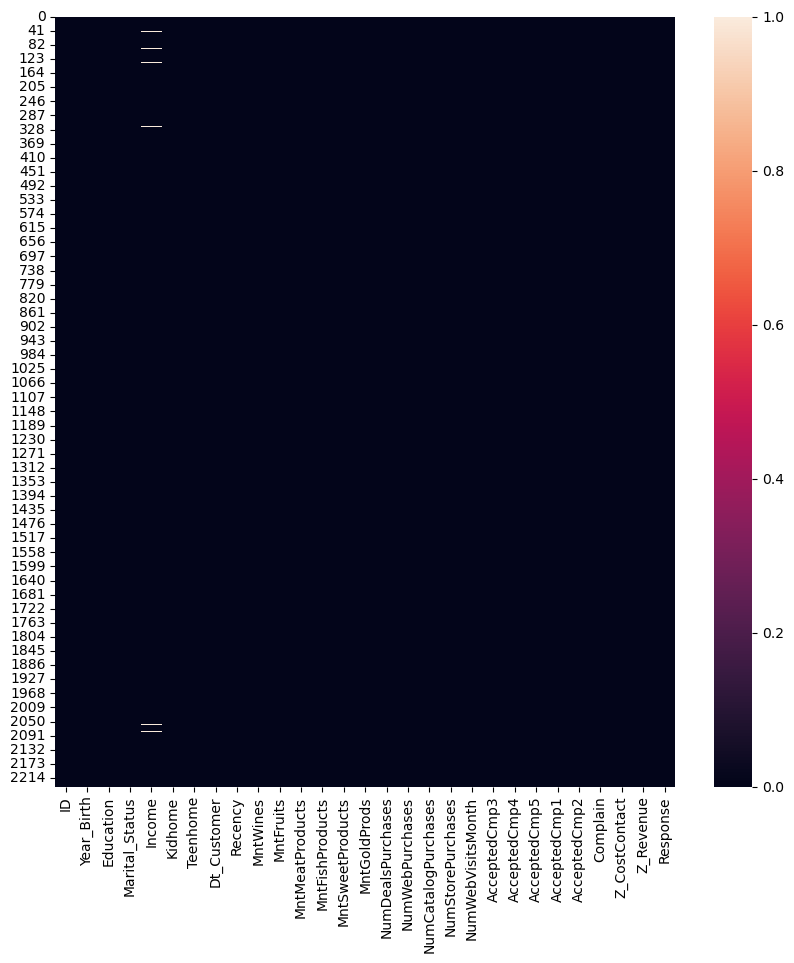

In [254]:
# Sebaran missing value dalam data
plt.figure(figsize=(10,10))
sns.heatmap(df.isna())

In [255]:
# Persentase missing value dalam kolom `Income`
df[['Income']].isna().sum()/df.shape[0]*100

Income    1.071429
dtype: float64

Dalam dataset Supermarket Customers terdapat **24 *missing values*** yang hanya ada dalam kolom `Income`. Langkah selanjutnya yang akan dilakukan adalah **menghapus baris** yang terdapat *missing values* tersebut *(drop rows)* dengan pertimbangan total *missing values* **di bawah 5%** (1.07%), sehingga data masih dianggap cukup baik dan dapat diandalkan.

In [256]:
# Drop missing value
df.dropna(inplace=True)

##### **Menangani Data Tanggal dalam Kolom `Dt_Customer`**

In [257]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 2216 entries, 0 to 2239
Data columns (total 29 columns):
 #   Column               Non-Null Count  Dtype  
---  ------               --------------  -----  
 0   ID                   2216 non-null   int64  
 1   Year_Birth           2216 non-null   int64  
 2   Education            2216 non-null   object 
 3   Marital_Status       2216 non-null   object 
 4   Income               2216 non-null   float64
 5   Kidhome              2216 non-null   int64  
 6   Teenhome             2216 non-null   int64  
 7   Dt_Customer          2216 non-null   object 
 8   Recency              2216 non-null   int64  
 9   MntWines             2216 non-null   int64  
 10  MntFruits            2216 non-null   int64  
 11  MntMeatProducts      2216 non-null   int64  
 12  MntFishProducts      2216 non-null   int64  
 13  MntSweetProducts     2216 non-null   int64  
 14  MntGoldProds         2216 non-null   int64  
 15  NumDealsPurchases    2216 non-null   int64 

Kolom `Dt_Customer` memiliki tipe **'object'**. Maka tipe data akan diubah menjadi **'datetime'** untuk mempermudah analisis.

In [258]:
# Menampilkan data dalam kolom `Dt_Customer`
df['Dt_Customer'].head()

0    04-09-2012
1    08-03-2014
2    21-08-2013
3    10-02-2014
4    19-01-2014
Name: Dt_Customer, dtype: object

In [259]:
# Mengubah tipe data kolom `Dt_Customer`
df['Dt_Customer'] = pd.to_datetime(df['Dt_Customer'], format='%d-%m-%Y')

In [260]:
df['Dt_Customer'].head()

0   2012-09-04
1   2014-03-08
2   2013-08-21
3   2014-02-10
4   2014-01-19
Name: Dt_Customer, dtype: datetime64[ns]

Kolom `Dt_Customer` merupakan kolom yang menunjukkan data **tanggal pelanggan terdaftar di supermarket**. Oleh karena itu, kita perlu melihat pada tahun berapakah pelanggan pertama kali dan terakhir terdaftar dalam dataset Supermarket Customers ini.

In [261]:
df['Dt_Customer'].dt.year.min() , df['Dt_Customer'].dt.year.max()

(2012, 2014)

Maka, dapat diasumsikan bahwa data Supermarket Customers ini diambil dalam rentang tahun **2012-2014**.

##### **Menangani Data *Outliers* di kolom `Year_Birth` dan `Income`**

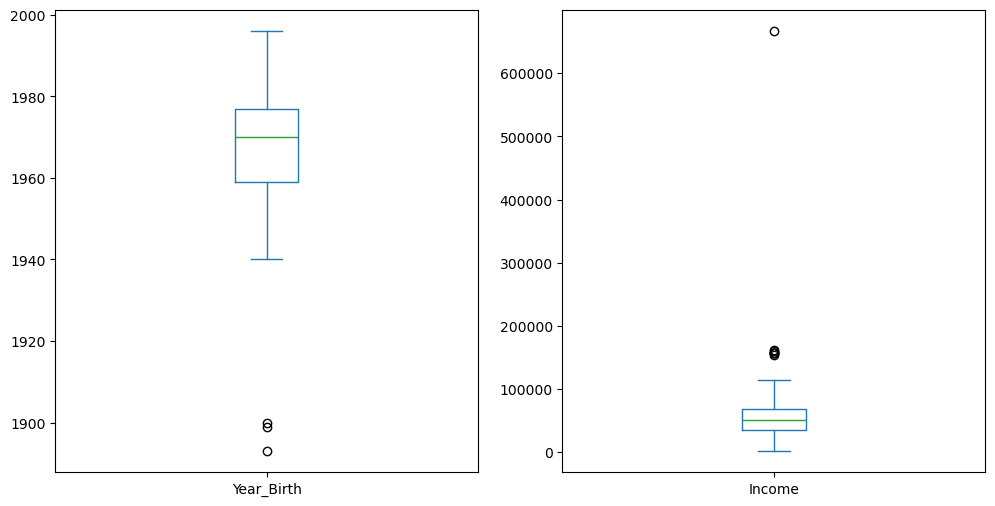

In [262]:
# Box Plot dari kolom `Year_Birth` dan `Income`
df[['Year_Birth', 'Income']].plot(subplots=True, layout=(1,2), kind='box', figsize=(12,6))
plt.show()

Kolom `Year_Birth` dan `Income` menunjukkan adanya data ***outliers***.

Pada kolom `Year_Birth` terdapat pelanggan yang lahir **sebelum tahun 1900** (yang berarti mereka sudah berusia lebih dari 100 tahun, yang kemungkinan besar tidak mungkin).

Pada kolom `Income` terdapat pelanggan yang berpenghasilan **lebih dari $600.000**. Ini mungkin merupakan kesalahan entri data, tetapi tidak bisa dipastikan.

Maka dari itu, pelanggan yang lahir sebelum tahun 1900 dan pelanggan yang memiliki pendapatan lebih dari $600.000 akan **dihapus**.

`Year_Birth`

In [263]:
# Menampilkan data dalam kolom `Year_Birth` dengan kelahiran sebelum tahun 1900
df[df['Year_Birth'] <= 1900]

,ID,Year_Birth,Education,Marital_Status,Income,Kidhome,Teenhome,Dt_Customer,Recency,MntWines,...,NumWebVisitsMonth,AcceptedCmp3,AcceptedCmp4,AcceptedCmp5,AcceptedCmp1,AcceptedCmp2,Complain,Z_CostContact,Z_Revenue,Response
192,7829,1900,2n Cycle,Divorced,36640.0,1,0,2013-09-26,99,15,...,5,0,0,0,0,0,1,3,11,0
239,11004,1893,2n Cycle,Single,60182.0,0,1,2014-05-17,23,8,...,4,0,0,0,0,0,0,3,11,0
339,1150,1899,PhD,Together,83532.0,0,0,2013-09-26,36,755,...,1,0,0,1,0,0,0,3,11,0


In [264]:
# Menghapus pelanggan dengan kelahiran sebelum tahun 1900
df = df.drop(df[df['Year_Birth'] <= 1900].index)

df[df['Year_Birth'] <= 1900]

,ID,Year_Birth,Education,Marital_Status,Income,Kidhome,Teenhome,Dt_Customer,Recency,MntWines,...,NumWebVisitsMonth,AcceptedCmp3,AcceptedCmp4,AcceptedCmp5,AcceptedCmp1,AcceptedCmp2,Complain,Z_CostContact,Z_Revenue,Response


In [265]:
# Mengubah tipe data kolom `Year_Birth`
df['Year_Birth'] = pd.to_datetime(df['Year_Birth'], format='%Y')

Agar lebih mudah dalam analisis data selanjutnya, maka ditambahkan kolom `Age` sebagai **usia pelanggan**. 

In [266]:
# Menambahkan kolom usia pelanggan `Age`
df['Age'] = (df['Dt_Customer'].dt.year.max()) - (df['Year_Birth'].dt.year)

In [267]:
# Mengubah tipe data `Age`
df['Age'] = df['Age'].astype('int64')

`Income`

In [268]:
# Menampilkan data dalam kolom `Income` dengan pendapatan > $600000
df[df['Income'] > 600000]

,ID,Year_Birth,Education,Marital_Status,Income,Kidhome,Teenhome,Dt_Customer,Recency,MntWines,...,AcceptedCmp3,AcceptedCmp4,AcceptedCmp5,AcceptedCmp1,AcceptedCmp2,Complain,Z_CostContact,Z_Revenue,Response,Age
2233,9432,1977-01-01,Graduation,Together,666666.0,1,0,2013-06-02,23,9,...,0,0,0,0,0,0,3,11,0,37


In [269]:
# Dengan nilai Income $666666, maka besar kemungkinan terjadi kesalahan entri data
# Menghapus pelanggan dengan pendapatan > $600000
df = df.drop(df[df['Income'] > 600000].index)

df[df['Income'] > 600000]

,ID,Year_Birth,Education,Marital_Status,Income,Kidhome,Teenhome,Dt_Customer,Recency,MntWines,...,AcceptedCmp3,AcceptedCmp4,AcceptedCmp5,AcceptedCmp1,AcceptedCmp2,Complain,Z_CostContact,Z_Revenue,Response,Age


##### **Menangani Data di kolom `Education` dan `Marital_Status`**

`Education`

In [270]:
# Menghitung jumlah nilai dalam kolom `Education`
df['Education'].value_counts()

Education
Graduation    1115
PhD            480
Master         365
2n Cycle       198
Basic           54
Name: count, dtype: int64

Dalam sistem pendidikan di Amerika Serikat, tingkat pendidikan dari yang tertinggi hingga terendah adalah sebagai berikut:
1. PhD atau Gelar Lanjutan dan Master *(postgraduate)*
3. Sarjana atau Associate *(graduate)*
4. SMA dan di bawahnya *(undergraduate)*

Berdasarkan riset, 2n Cycle merepresentasikan tingkat pendidikan pascasarjana. Sehingga masuk ke dalam kategori *postgraduate*.

Oleh karena itu, dilakukan penyesuaian terhadap kategori dalam `Education` menjadi sebagai berikut.

1. 'PhD' sebagai gelar tertinggi dalam pendidikan masuk ke dalam kategori **'Postgraduate'**.
2. '2n Cycle' dan 'Master' akan diperlakukan sama dan masuk ke dalam kategori **'Postgraduate'**.
3. 'Graduation' sebagai gelar sarjana akan masuk ke dalam kategori **'Graduate'**.
4. 'Basic' sebagai tingkat pendidikan SMA ke bawah akan masuk dalam kategori **'Undergraduate'**.

In [271]:
education_map = {'Basic':'Undergraduate',
                 'Graduation':'Graduate',
                 '2n Cycle':'Postgraduate', 
                 'Master':'Postgraduate',
                 'PhD':'Postgraduate'}

df['Education'] = df['Education'].map(education_map)

In [272]:
df['Education'].value_counts(dropna=False)

Education
Graduate         1115
Postgraduate     1043
Undergraduate      54
Name: count, dtype: int64

`Marital_Status`

In [273]:
# Menghitung jumlah nilai dalam kolom `Marital_Status`
df['Marital_Status'].value_counts()

Marital_Status
Married     857
Together    571
Single      470
Divorced    231
Widow        76
Alone         3
Absurd        2
YOLO          2
Name: count, dtype: int64

Untuk status pernikahan, definisinya bersifat hukum. Secara umum ada beberapa kategori yang diakui secara luas, yaitu Married (Menikah), Single (Belum Menikah), Divorced (Cerai), dan Widow (Duda/Janda).

Maka dari itu, data dalam kolom `Marital_Status` akan dikelompokkan kembali menjadi sebagai berikut.

1. **'Together'** dapat diartikan bahwa seseorang sedang dalam suatu hubungan, tetapi tidak terikat secara hukum sebagai suami-istri. Klasifikasinya akan disamakan dengan **'Married'** yang tentunya sudah memiliki pasangan.

2. **'Alone'** akan diklasifikasikan sebagai **'Single'**. Ini berarti bahwa individu yang menganggap dirinya "sendiri" akan ditempatkan dalam kategori yang sama dengan mereka yang belum menikah.

3. **'Absurd'** dan **'YOLO'** dianggap tidak sesuai dengan kategori yang ada, maka akan diklasifikasikan sebagai orang yang tidak mempunyai pasangan.

4. **'Divorced'** dan **'Widow'** akan diklasifikasikan sebagai orang yang sudah tidak mempunyai pasangan, dan sah secara hukum.

Dengan pengelompokan ini, kita dapat memastikan bahwa status pernikahan dalam dataset lebih terstandarisasi dan dapat dianalisis dengan lebih baik.

In [274]:
marital_map = {'Married':'Married', 'Together':'Married',
               'Single':'Single',  'Alone':'Single',
               'Divorced':'Divorced', 'Widow':'Widow',
               'YOLO':'Single', 'Absurd':'Single'}

df['Marital_Status'] = df['Marital_Status'].map(marital_map)

In [275]:
df['Marital_Status'].value_counts(dropna=False)

Marital_Status
Married     1428
Single       477
Divorced     231
Widow         76
Name: count, dtype: int64

##### **Menambahkan Kolom Baru yang Diperlukan**

Agar memudahkan dalam analisa selanjutnya, ditambahkan beberapa kolom baru sebagai berikut.

`Year_Joined`, `Month_Joined`, `Date_Joined`, dan `Day_Joined`

In [276]:
# Mengelompokkan `Dt_Customer` berdasarkan tahun, bulan, tanggal, dan hari
df['Year_Joined'] = df['Dt_Customer'].dt.year
df['Month_Joined'] = df['Dt_Customer'].dt.strftime("%B")
df['Date_Joined'] = df['Dt_Customer'].dt.strftime('%d')
df['Day_Joined'] = df['Dt_Customer'].dt.day_name()

In [277]:
# Mengubah tipe data `Year_Joined`
df['Year_Joined'] = df['Year_Joined'].astype('object')

- **Under 18** (di bawah 18 tahun)  
- **Young Adult** (18-24 tahun)  
- **Adult** (25-44 tahun)  
- **Middle Age** (45-64 tahun)  
- **Senior** (65 tahun ke atas)

##### **Menghapus Kolom yang Tidak Digunakan**

Untuk analisis selanjutnya, ada beberapa kolom yang tidak digunakan, yaitu `ID`, `Z_CostContact`, `Z_Revenue`, `Year_Birth`, dan `Dt_Customer`.

- `ID` tidak diperlukan karena tidak mempengaruhi hasil analisis.
-
- `Z_CostContact` dan `Z_Revenue` tidak digunakan karena hanya memiliki satu nilai, sehingga tidak relevan.
- `Year_Birth` tidak digunakan karena sudah diwakili dengan kolom `Age`.
- `Dt_Customer` tidak digunakan karena sudah diwakili dengan kolom lain yang menunjukkan waktu bergabung dan lama pelanggan terdaftar di supermarket.

In [278]:
# Menghapus kolom yang tidak digunakan
df.drop(['ID','Z_CostContact','Z_Revenue','Year_Birth','Dt_Customer'], axis=1, inplace=True)

## Tampilan Data Terakhir

In [279]:
df

,Education,Marital_Status,Income,Kidhome,Teenhome,Recency,MntWines,MntFruits,MntMeatProducts,MntFishProducts,...,AcceptedCmp5,AcceptedCmp1,AcceptedCmp2,Complain,Response,Age,Year_Joined,Month_Joined,Date_Joined,Day_Joined
0,Graduate,Single,58138.0,0,0,58,635,88,546,172,...,0,0,0,0,1,57,2012,September,04,Tuesday
1,Graduate,Single,46344.0,1,1,38,11,1,6,2,...,0,0,0,0,0,60,2014,March,08,Saturday
2,Graduate,Married,71613.0,0,0,26,426,49,127,111,...,0,0,0,0,0,49,2013,August,21,Wednesday
3,Graduate,Married,26646.0,1,0,26,11,4,20,10,...,0,0,0,0,0,30,2014,February,10,Monday
4,Postgraduate,Married,58293.0,1,0,94,173,43,118,46,...,0,0,0,0,0,33,2014,January,19,Sunday
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2235,Graduate,Married,61223.0,0,1,46,709,43,182,42,...,0,0,0,0,0,47,2013,June,13,Thursday
2236,Postgraduate,Married,64014.0,2,1,56,406,0,30,0,...,0,1,0,0,0,68,2014,June,10,Tuesday
2237,Graduate,Divorced,56981.0,0,0,91,908,48,217,32,...,0,0,0,0,0,33,2014,January,25,Saturday
2238,Postgraduate,Married,69245.0,0,1,8,428,30,214,80,...,0,0,0,0,0,58,2014,January,24,Friday


In [280]:
listItem = []
for col in df.columns :
    listItem.append([col, df[col].dtype, df[col].isna().sum(),
                    df[col].nunique(), df[col].unique()]);

dfDesc = pd.DataFrame(columns=['dataFeatures', 'dataType', 'null', 'unique', 'uniqueSample'],
                     data=listItem)
print(df.shape)
dfDesc

(2212, 29)


,dataFeatures,dataType,null,unique,uniqueSample
0,Education,object,0,3,"[Graduate, Postgraduate, Undergraduate]"
1,Marital_Status,object,0,4,"[Single, Married, Divorced, Widow]"
2,Income,float64,0,1970,"[58138.0, 46344.0, 71613.0, 26646.0, 58293.0, 62513.0, 55635.0, 33454.0, 30351.0, 5648.0, 7500.0, 63033.0, 59354.0, 17323.0, 82800.0, 41850.0, 37760.0, 76995.0, 33812.0, 37040.0, 2447.0, 58607.0, 65324.0, 40689.0, 18589.0, 53359.0, 38360.0, 84618.0, 10979.0, 38620.0, 40548.0, 46610.0, 68657.0, 49389.0, 67353.0, 23718.0, 42429.0, 48948.0, 80011.0, 20559.0, 21994.0, 79941.0, 41728.0, 72550.0, 65486.0, 79143.0, 35790.0, 82582.0, 66373.0, 82384.0, 70287.0, 27938.0, 55954.0, 75777.0, 66653.0, 61823.0, 67680.0, 70666.0, 25721.0, 32474.0, 88194.0, 69096.0, 74854.0, 66991.0, 65031.0, 60631.0, 28332.0, 40246.0, 75251.0, 75825.0, 26326.0, 56046.0, 29760.0, 26304.0, 23559.0, 81361.0, 29440.0, 36138.0, 50388.0, 79593.0, 54178.0, 42394.0, 23626.0, 30096.0, 47916.0, 51813.0, 78497.0, 50150.0, 47823.0, 34554.0, 85693.0, 65846.0, 87195.0, 24594.0, 49096.0, 52413.0, 38557.0, 89058.0, 77298.0, 68126.0, ...]"
3,Kidhome,int64,0,3,"[0, 1, 2]"
4,Teenhome,int64,0,3,"[0, 1, 2]"
5,Recency,int64,0,100,"[58, 38, 26, 94, 16, 34, 32, 19, 68, 59, 82, 53, 23, 51, 20, 91, 86, 41, 42, 63, 0, 69, 89, 4, 96, 56, 31, 8, 55, 37, 76, 99, 3, 88, 72, 24, 92, 39, 29, 2, 54, 57, 30, 12, 18, 75, 90, 1, 40, 9, 87, 5, 95, 48, 70, 79, 84, 44, 43, 35, 15, 17, 46, 27, 25, 74, 85, 65, 13, 83, 10, 21, 61, 73, 47, 36, 49, 28, 64, 98, 78, 77, 81, 80, 45, 14, 52, 93, 50, 60, 11, 66, 97, 62, 6, 33, 22, 71, 67, 7]"
6,MntWines,int64,0,775,"[635, 11, 426, 173, 520, 235, 76, 14, 28, 6, 194, 233, 3, 1006, 53, 84, 1012, 4, 86, 1, 867, 384, 270, 36, 684, 8, 112, 110, 96, 482, 40, 702, 55, 437, 421, 13, 9, 123, 826, 245, 650, 12, 510, 328, 984, 295, 447, 712, 452, 523, 546, 398, 10, 688, 247, 856, 496, 258, 565, 2, 721, 1032, 577, 64, 25, 163, 17, 130, 292, 350, 135, 15, 27, 5, 505, 51, 207, 41, 386, 562, 217, 144, 454, 425, 1332, 527, 490, 378, 547, 47, 320, 34, 722, 162, 450, 70, 492, 120, 534, 236, ...]"
7,MntFruits,int64,0,158,"[88, 1, 49, 4, 43, 42, 65, 10, 0, 16, 61, 2, 14, 22, 5, 80, 17, 3, 100, 12, 34, 8, 76, 164, 18, 6, 50, 19, 37, 120, 9, 51, 35, 26, 7, 40, 59, 36, 107, 111, 105, 23, 60, 46, 172, 81, 106, 194, 115, 44, 99, 90, 48, 27, 33, 133, 58, 28, 21, 20, 11, 162, 71, 66, 30, 189, 138, 29, 24, 32, 86, 114, 153, 64, 134, 148, 47, 41, 84, 74, 129, 15, 98, 183, 147, 104, 91, 163, 152, 53, 68, 137, 190, 38, 70, 96, 25, 13, 83, 92, ...]"
8,MntMeatProducts,int64,0,553,"[546, 6, 127, 20, 118, 98, 164, 56, 24, 11, 480, 53, 17, 115, 19, 38, 498, 73, 1725, 86, 102, 27, 25, 30, 42, 801, 10, 44, 5, 96, 471, 151, 14, 206, 536, 29, 266, 15, 317, 125, 780, 550, 124, 432, 482, 8, 28, 538, 134, 48, 367, 1, 309, 159, 487, 460, 291, 65, 13, 925, 779, 64, 68, 424, 16, 37, 568, 39, 26, 7, 447, 92, 183, 276, 690, 32, 271, 31, 106, 292, 311, 21, 101, 812, 94, 133, 951, 110, 47, 189, 33, 590, 3, 34, 12, 921, 232, 756, 132, 41, ...]"
9,MntFishProducts,int64,0,182,"[172, 2, 111, 10, 46, 0, 50, 3, 1, 11, 225, 6, 59, 150, 30, 69, 21, 39, 15, 20, 34, 33, 119, 160, 82, 227, 37, 27, 156, 12, 180, 121, 16, 201, 7, 58, 189, 84, 4, 97, 137, 110, 75, 65, 185, 80, 31, 23, 29, 151, 123, 44, 40, 173, 38, 52, 13, 36, 43, 73, 32, 8, 19, 149, 134, 86, 140, 147, 224, 42, 76, 47, 254, 25, 67, 28, 186, 218, 104, 133, 220, 45, 24, 205, 162, 95, 101, 188, 55, 166, 216, 60, 219, 17, 77, 78, 72, 212, 129, 93, ...]"


Berikut adalah data dari Supermarket Customers yang sudah dibersihkan dan ditangani anomali datanya. Mulai dari membersihkan *missing value*, menyesuaikan tipe data, menghapus kolom yang tidak terpakai, menghilangkan data *outliers*, hingga mengelompokkan kembali kategori dalam data.

Data yang sebelumnya terdiri dari 2240 baris dan 29 kolom, kini menjadi **2212 baris** dan **29 kolom** (Termasuk tambahan kolom baru dan pengurangan kolom lama).

# Analisis Data

In [281]:
display(df.describe(), df.describe(include='object'))

,Income,Kidhome,Teenhome,Recency,MntWines,MntFruits,MntMeatProducts,MntFishProducts,MntSweetProducts,MntGoldProds,...,NumStorePurchases,NumWebVisitsMonth,AcceptedCmp3,AcceptedCmp4,AcceptedCmp5,AcceptedCmp1,AcceptedCmp2,Complain,Response,Age
count,2212.000000,2212.000000,2212.000000,2212.000000,2212.000000,2212.000000,2212.000000,2212.000000,2212.000000,2212.000000,...,2212.000000,2212.000000,2212.000000,2212.000000,2212.000000,2212.000000,2212.000000,2212.000000,2212.000000,2212.000000
mean,51958.810579,0.441682,0.505877,49.019439,305.287523,26.329566,167.029837,37.648734,27.046564,43.925859,...,5.806510,5.321429,0.073689,0.074141,0.072785,0.064195,0.013562,0.009042,0.150542,45.086347
std,21527.278844,0.536955,0.544253,28.943121,337.322940,39.744052,224.254493,54.772033,41.090991,51.706981,...,3.250939,2.425597,0.261323,0.262060,0.259842,0.245156,0.115691,0.094678,0.357683,11.701599
min,1730.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,18.000000
25%,35233.500000,0.000000,0.000000,24.000000,24.000000,2.000000,16.000000,3.000000,1.000000,9.000000,...,3.000000,3.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,37.000000
50%,51371.000000,0.000000,0.000000,49.000000,175.500000,8.000000,68.000000,12.000000,8.000000,24.500000,...,5.000000,6.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,44.000000
75%,68487.000000,1.000000,1.000000,74.000000,505.000000,33.000000,232.250000,50.000000,33.000000,56.000000,...,8.000000,7.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,55.000000
max,162397.000000,2.000000,2.000000,99.000000,1493.000000,199.000000,1725.000000,259.000000,262.000000,321.000000,...,13.000000,20.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,74.000000


,Education,Marital_Status,Year_Joined,Month_Joined,Date_Joined,Day_Joined
count,2212,2212,2212,2212,2212,2212
unique,3,4,3,12,31,7
top,Graduate,Married,2013,August,12,Wednesday
freq,1115,1428,1170,219,101,336


Untuk menganalisis saluran *(channel)* penjualan yang paling banyak digunakan oleh pelanggan, saya akan mengevaluasi tiga jenis saluran penjualan yang terdapat dalam dataset ini, yaitu pembelian melalui **web**, **katalog**, dan **toko fisik**.

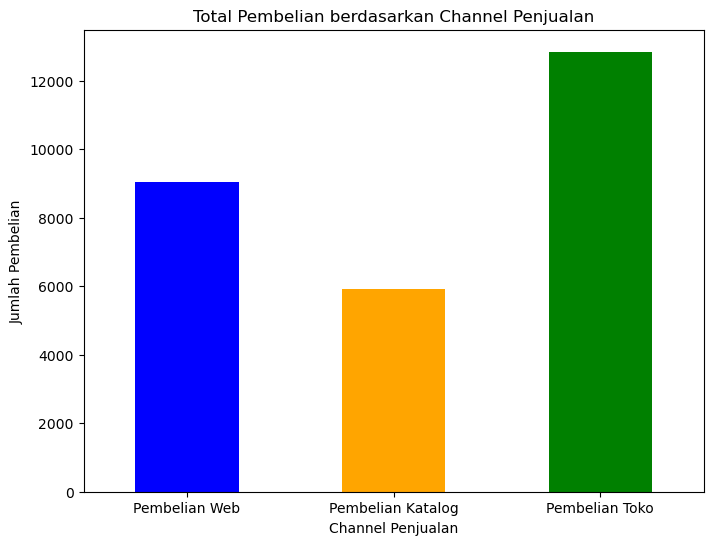

In [282]:
channel_cols = ['NumWebPurchases', 'NumCatalogPurchases', 'NumStorePurchases']
channel_sums = df[channel_cols].sum()

plt.figure(figsize=(8,6))
channel_sums.plot(kind='bar', color=['blue', 'orange', 'green'])
plt.title('Total Pembelian berdasarkan Channel Penjualan')
plt.ylabel('Jumlah Pembelian')
plt.xlabel('Channel Penjualan')
plt.xticks(ticks=[0, 1, 2], labels=['Pembelian Web', 'Pembelian Katalog', 'Pembelian Toko'], rotation=0)
plt.show()

Total penggunaan saluran penjualan: **Toko fisik** adalah saluran yang paling sering digunakan untuk pembelian **(12,849)**, diikuti oleh pembelian melalui **web (9,049)** dan **katalog (5,840)**.

##### **Preferensi Pelanggan Terhadap Saluran Penjualan**

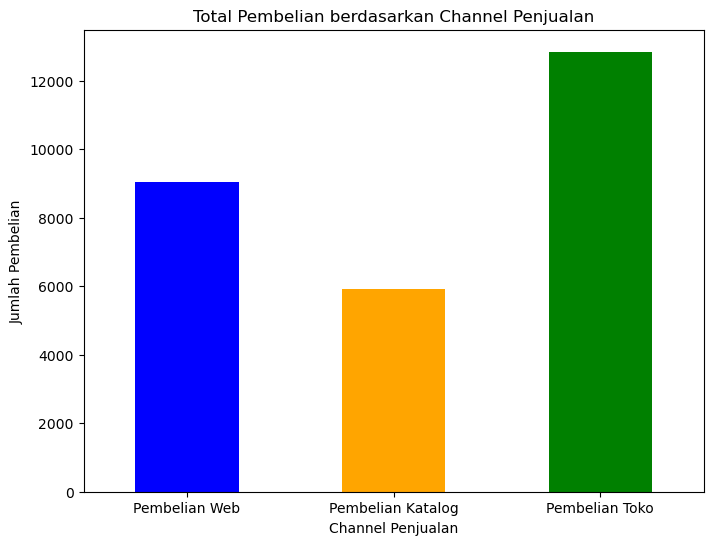

(               NumWebPurchases  NumCatalogPurchases  NumStorePurchases
 Education                                                             
 Graduate                  4590                 3055               6516
 Postgraduate              4351                 2830               6174
 Undergraduate              102                   26                154,
                       NumWebPurchases  NumCatalogPurchases  NumStorePurchases
 Income                                                                       
 (1569.333, 33863.4]               990                  230               1471
 (33863.4, 65996.8]               4692                 2162               6113
 (65996.8, 98130.2]               3297                 3395               5190
 (98130.2, 130263.6]                63                   46                 67
 (130263.6, 162397.0]                1                   78                  3,
              NumWebPurchases  NumCatalogPurchases  NumStorePurchases
 Age           

In [283]:
channel_cols = ['NumWebPurchases', 'NumCatalogPurchases', 'NumStorePurchases']
channel_sums = df[channel_cols].sum()

plt.figure(figsize=(8,6))
channel_sums.plot(kind='bar', color=['blue', 'orange', 'green'])
plt.title('Total Pembelian berdasarkan Channel Penjualan')
plt.ylabel('Jumlah Pembelian')
plt.xlabel('Channel Penjualan')
plt.xticks(ticks=[0, 1, 2], labels=['Pembelian Web', 'Pembelian Katalog', 'Pembelian Toko'], rotation=0)
plt.show()

education_group = df.groupby('Education')[channel_cols].sum()
income_group = df.groupby(pd.cut(df['Income'], bins=5))[channel_cols].sum()
age_group = df.groupby(pd.cut(x = df['Age'], bins = [0, 18, 24, 44, 64, 120],
                         labels = ['Under 18','Young Adult','Adult','Middle Age','Senior']))[channel_cols].sum()

education_group, income_group, age_group


**Preferensi berdasarkan tingkat pendidikan:**
- Pelanggan dengan gelar Sarjana (Graduate) lebih banyak menggunakan toko fisik, diikuti oleh pembelian melalui web.
- Pelanggan dengan gelar Pascasarjana (Postgraduate) juga lebih sering menggunakan toko fisik dibandingkan channel lainnya.

**Preferensi berdasarkan pendapatan:**
- Kelompok pendapatan rendah hingga menengah cenderung lebih memilih pembelian langsung di toko, mungkin karena keterbatasan akses digital atau preferensi belanja fisik.
- Pendapatan menengah ke atas menunjukkan peningkatan pembelian di semua kategori dengan toko tetap dominan.
- Pendapatan tinggi lebih seimbang antara pembelian web, katalog, dan toko.
- Kelompok dengan pendapatan sangat tinggi menunjukkan penurunan pembelian drastis di semua kategori, kemungkinan lebih memilih produk eksklusif atau premium.

**Preferensi berdasarkan usia:**
- Kelompok usia di bawah 18 tahun memiliki tingkat pembelian rendah karena keterbatasan finansial.
- Young Adult (18-30 tahun) mulai terlibat dengan preferensi beragam, tetapi toko tetap utama.
- Adult (31-45 tahun) menunjukkan peningkatan pembelian di semua kategori, terutama di toko, memenuhi kebutuhan keluarga.
- Middle Age (46-60 tahun) paling aktif di semua kategori dengan daya beli kuat, terutama di toko.
- Senior (lebih dari 60 tahun) mengalami penurunan pembelian namun masih lebih memilih belanja di toko.

##### **Kontribusi Setiap Saluran Penjualan Terhadap Penjualan Keseluruhan**

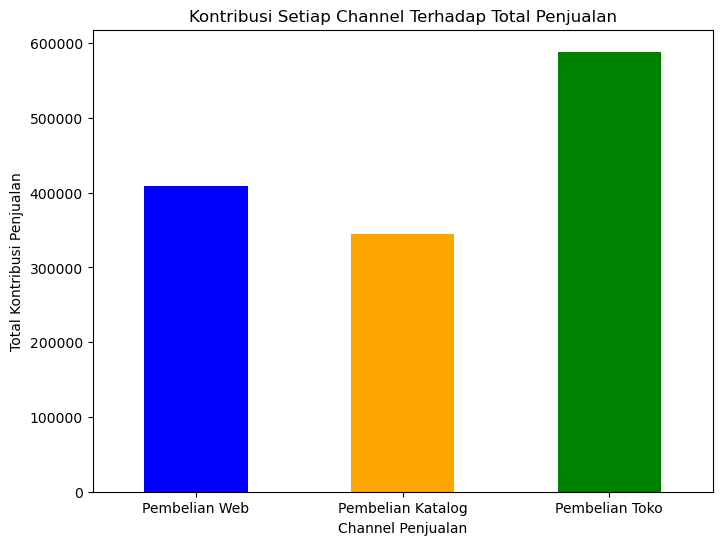

Contribution_Web        409202.023517
Contribution_Catalog    345396.014718
Contribution_Store      588636.961765
dtype: float64

In [284]:
total_sales = df[['MntWines', 'MntFruits', 'MntMeatProducts', 'MntFishProducts', 'MntSweetProducts', 'MntGoldProds']].sum(axis=1)

df['Total_Purchases'] = df['NumWebPurchases'] + df['NumCatalogPurchases'] + df['NumStorePurchases']
df['Contribution_Web'] = (df['NumWebPurchases'] / df['Total_Purchases']) * total_sales
df['Contribution_Catalog'] = (df['NumCatalogPurchases'] / df['Total_Purchases']) * total_sales
df['Contribution_Store'] = (df['NumStorePurchases'] / df['Total_Purchases']) * total_sales

contribution_sums = df[['Contribution_Web', 'Contribution_Catalog', 'Contribution_Store']].sum()

plt.figure(figsize=(8,6))
contribution_sums.plot(kind='bar', color=['blue', 'orange', 'green'])
plt.title('Kontribusi Setiap Channel Terhadap Total Penjualan')
plt.ylabel('Total Kontribusi Penjualan')
plt.xlabel('Channel Penjualan')
plt.xticks(ticks=[0, 1, 2], labels=['Pembelian Web', 'Pembelian Katalog', 'Pembelian Toko'], rotation=0)
plt.show()

contribution_sums


Berdasarkan data kontribusi penjualan:
- Pembelian melalui toko fisik memberikan kontribusi terbesar terhadap total penjualan dengan angka 588,637 menjadikannya *channel* dengan penjualan paling signifikan.
- Pembelian melalui web menyumbang sekitar 409,202 yang menunjukkan bahwa pembelian secara *online* juga memberikan kontribusi yang cukup besar.
- Pembelian melalui katalog memiliki kontribusi sebesar 345,396 menjadikannya *channel* dengan kontribusi terendah terhadap total penjualan.

Dengan demikian, toko fisik tidak hanya menjadi *channel* penjualan yang paling sering digunakan, tetapi juga menyumbangkan penjualan terbesar dibandingkan *channel* lainnya.

##### **Frekuensi Interaksi dengan *Online Channel* dan Korelasinya dengan Pembelian**

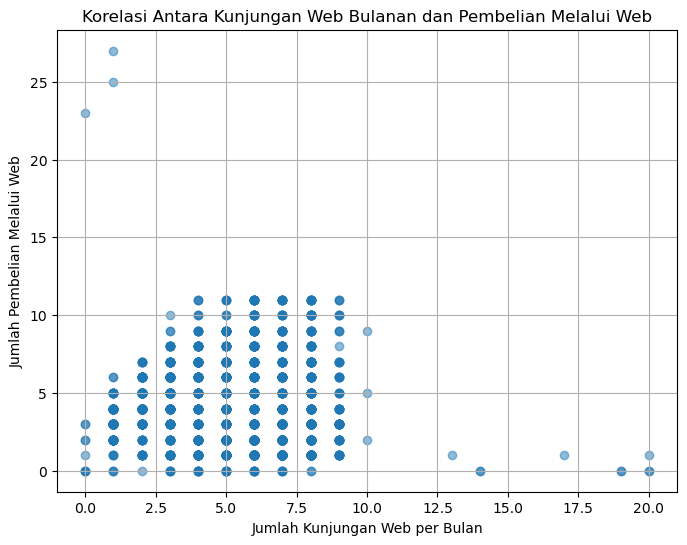

-0.05158855946492764

In [285]:
correlation = df['NumWebVisitsMonth'].corr(df['NumWebPurchases'])

plt.figure(figsize=(8,6))
plt.scatter(df['NumWebVisitsMonth'], df['NumWebPurchases'], alpha=0.5)
plt.title('Korelasi Antara Kunjungan Web Bulanan dan Pembelian Melalui Web')
plt.xlabel('Jumlah Kunjungan Web per Bulan')
plt.ylabel('Jumlah Pembelian Melalui Web')
plt.grid(True)
plt.show()

correlation

- Kunjungan web bulanan tidak memiliki korelasi yang kuat dengan jumlah pembelian melalui web, dengan koefisien korelasi sekitar -0,0515. Artinya, kunjungan ke situs web tidak selalu berkorelasi dengan peningkatan pembelian melalui web.

- Dari grafik, terlihat bahwa meskipun ada pelanggan yang sering mengunjungi situs web, hal ini tidak secara langsung berhubungan dengan jumlah transaksi yang mereka lakukan. Ada gap antara frekuensi kunjungan dan transaksi, yang mungkin disebabkan oleh faktor lain seperti harga produk, pengalaman pengguna di situs web, atau preferensi belanja di toko fisik.


##### **Saluran Penjualan yang Kurang Efektif**

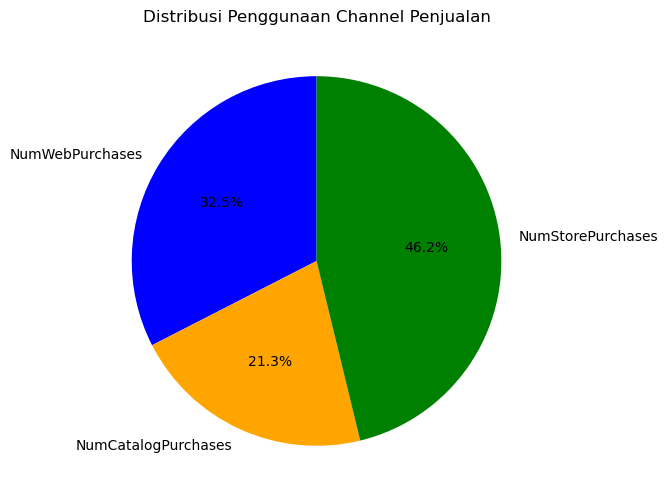

NumWebPurchases        32.531117
NumCatalogPurchases    21.264120
NumStorePurchases      46.204763
dtype: float64

In [286]:
channel_usage = df[['NumWebPurchases', 'NumCatalogPurchases', 'NumStorePurchases']].sum()

channel_usage_perc = (channel_usage / channel_usage.sum()) * 100

plt.figure(figsize=(8,6))
channel_usage_perc.plot(kind='pie', autopct='%1.1f%%', startangle=90, colors=['blue', 'orange', 'green'])
plt.title('Distribusi Penggunaan Channel Penjualan')
plt.ylabel('')
plt.show()

channel_usage_perc

Pembelian melalui katalog merupakan channel yang paling sedikit diminati oleh pelanggan, dengan hanya sekitar 21.2% dari total transaksi. Ini menandakan bahwa katalog mungkin kurang efektif dibandingkan *channel* lainnya seperti toko fisik dan pembelian melalui web.

##### **Analisis Demografis Pelanggan dengan Saluran Penjualan**

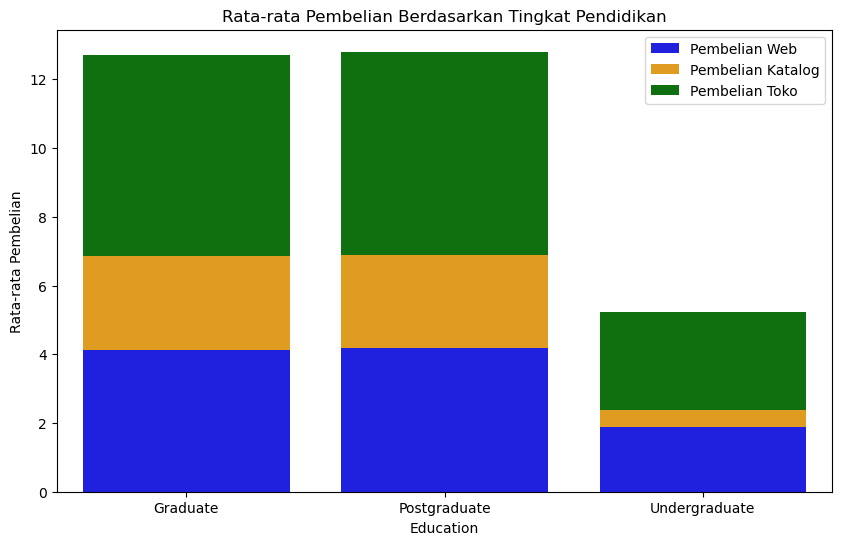

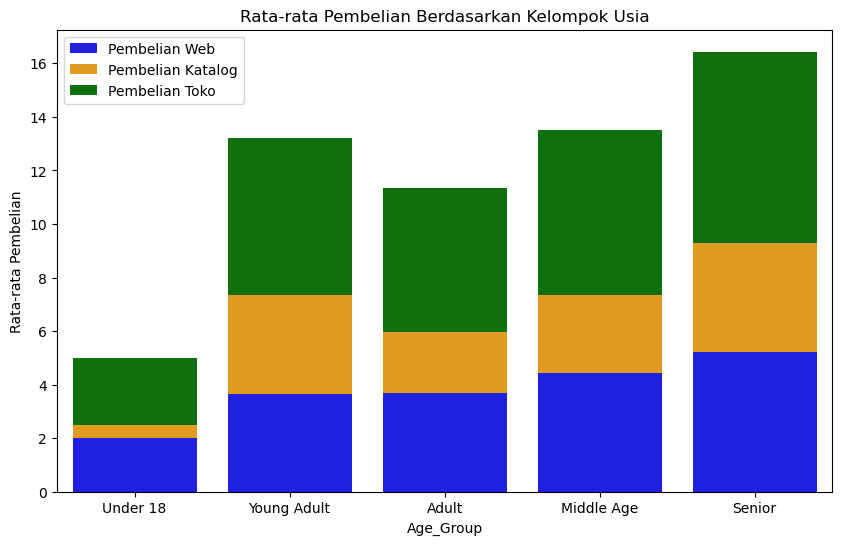

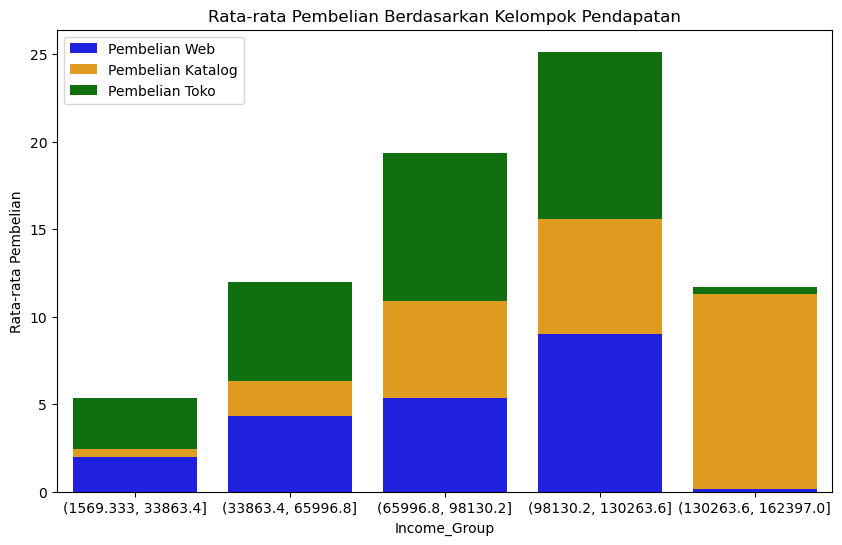

In [287]:
education_sales = df.groupby('Education')[['NumWebPurchases', 'NumCatalogPurchases', 'NumStorePurchases']].mean().reset_index()

df['Income_Group'] = pd.cut(df['Income'], bins=5)
income_sales = df.groupby('Income_Group')[['NumWebPurchases', 'NumCatalogPurchases', 'NumStorePurchases']].mean().reset_index()

df['Age_Group'] = pd.cut(x = df['Age'], bins = [0, 18, 24, 44, 64, 120],
                         labels = ['Under 18','Young Adult','Adult','Middle Age','Senior'])
age_sales = df.groupby('Age_Group')[['NumWebPurchases', 'NumCatalogPurchases', 'NumStorePurchases']].mean().reset_index()

plt.figure(figsize=(10,6))
sns.barplot(x='Education', y='NumWebPurchases', data=education_sales, label='Pembelian Web', color='blue')
sns.barplot(x='Education', y='NumCatalogPurchases', data=education_sales, label='Pembelian Katalog', color='orange', bottom=education_sales['NumWebPurchases'])
sns.barplot(x='Education', y='NumStorePurchases', data=education_sales, label='Pembelian Toko', color='green', bottom=education_sales['NumWebPurchases'] + education_sales['NumCatalogPurchases'])
plt.title('Rata-rata Pembelian Berdasarkan Tingkat Pendidikan')
plt.ylabel('Rata-rata Pembelian')
plt.legend()
plt.show()

plt.figure(figsize=(10,6))
sns.barplot(x='Age_Group', y='NumWebPurchases', data=age_sales, label='Pembelian Web', color='blue')
sns.barplot(x='Age_Group', y='NumCatalogPurchases', data=age_sales, label='Pembelian Katalog', color='orange', bottom=age_sales['NumWebPurchases'])
sns.barplot(x='Age_Group', y='NumStorePurchases', data=age_sales, label='Pembelian Toko', color='green', bottom=age_sales['NumWebPurchases'] + age_sales['NumCatalogPurchases'])
plt.title('Rata-rata Pembelian Berdasarkan Kelompok Usia')
plt.ylabel('Rata-rata Pembelian')
plt.legend()
plt.show()

plt.figure(figsize=(10,6))
sns.barplot(x='Income_Group', y='NumWebPurchases', data=income_sales, label='Pembelian Web', color='blue')
sns.barplot(x='Income_Group', y='NumCatalogPurchases', data=income_sales, label='Pembelian Katalog', color='orange', bottom=income_sales['NumWebPurchases'])
sns.barplot(x='Income_Group', y='NumStorePurchases', data=income_sales, label='Pembelian Toko', color='green', bottom=income_sales['NumWebPurchases'] + income_sales['NumCatalogPurchases'])
plt.title('Rata-rata Pembelian Berdasarkan Kelompok Pendapatan')
plt.ylabel('Rata-rata Pembelian')
plt.legend()
plt.show()

Ada hubungan yang jelas antara demografi pelanggan (tingkat pendidikan, usia, dan pendapatan) dengan preferensi mereka terhadap saluran penjualan. Secara umum:
1. Pelanggan yang lebih tua dan berpendidikan tinggi lebih memilih toko fisik.
2. Pelanggan muda lebih nyaman berbelanja online.
3. Tingkat pendapatan mempengaruhi frekuensi pembelian, dengan pelanggan berpendapatan rendah hingga menengah lebih aktif dalam menggunakan berbagai saluran penjualan.

##### **Analisis Hubungan Produk dengan Saluran Penjualan**

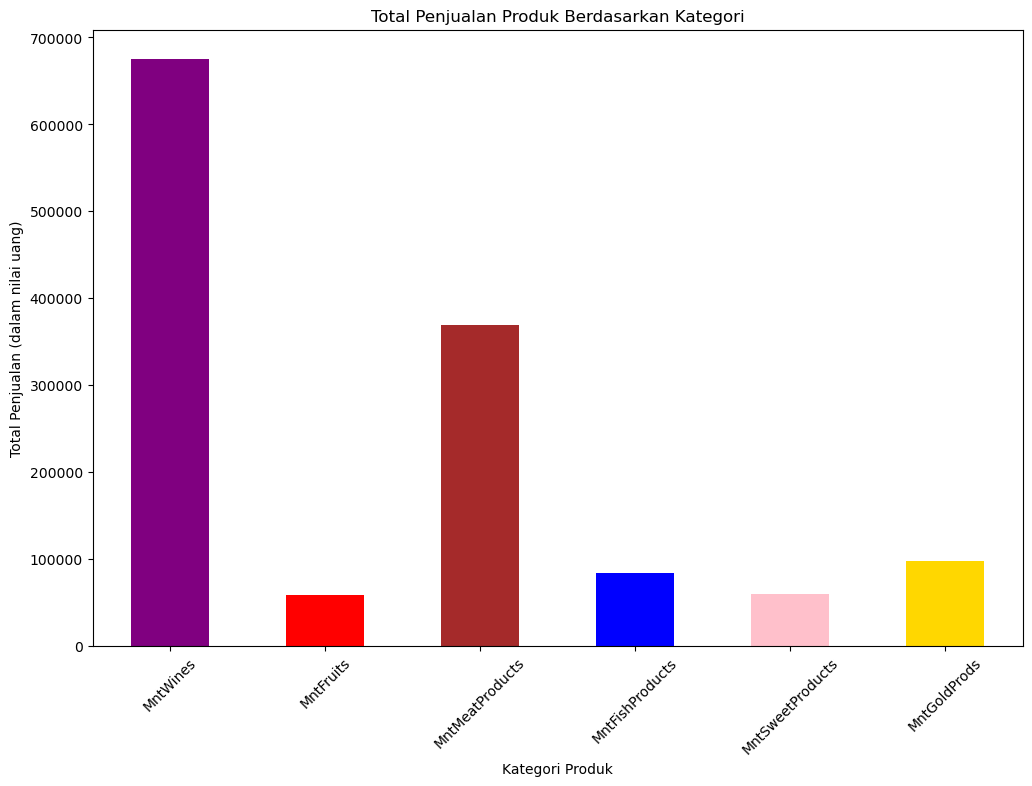

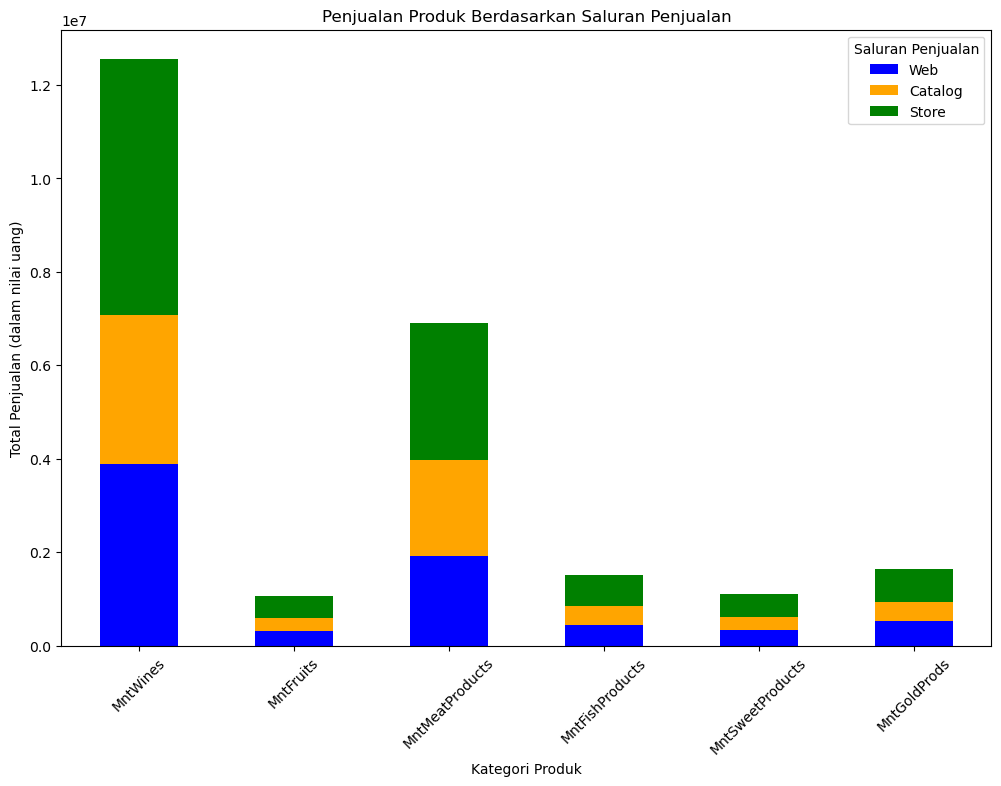

In [288]:
product_cols = ['MntWines', 'MntFruits', 'MntMeatProducts', 'MntFishProducts', 'MntSweetProducts', 'MntGoldProds']

product_sales_per_channel = df[product_cols + channel_cols].sum()

plt.figure(figsize=(12,8))
product_sales_per_channel[product_cols].plot(kind='bar', color=['purple', 'red', 'brown', 'blue', 'pink', 'gold'])
plt.title('Total Penjualan Produk Berdasarkan Kategori')
plt.ylabel('Total Penjualan (dalam nilai uang)')
plt.xlabel('Kategori Produk')
plt.xticks(rotation=45)
plt.show()

web_sales = df[['MntWines', 'MntFruits', 'MntMeatProducts', 'MntFishProducts', 'MntSweetProducts', 'MntGoldProds']].mul(df['NumWebPurchases'], axis=0).sum()
catalog_sales = df[['MntWines', 'MntFruits', 'MntMeatProducts', 'MntFishProducts', 'MntSweetProducts', 'MntGoldProds']].mul(df['NumCatalogPurchases'], axis=0).sum()
store_sales = df[['MntWines', 'MntFruits', 'MntMeatProducts', 'MntFishProducts', 'MntSweetProducts', 'MntGoldProds']].mul(df['NumStorePurchases'], axis=0).sum()

product_channel_sales = pd.DataFrame({
    'Web': web_sales,
    'Catalog': catalog_sales,
    'Store': store_sales
})

product_channel_sales.plot(kind='bar', stacked=True, figsize=(12,8), color=['blue', 'orange', 'green'])
plt.title('Penjualan Produk Berdasarkan Saluran Penjualan')
plt.ylabel('Total Penjualan (dalam nilai uang)')
plt.xlabel('Kategori Produk')
plt.xticks(rotation=45)
plt.legend(title='Saluran Penjualan')
plt.show()

1. Toko fisik adalah saluran utama untuk produk-produk sehari-hari seperti daging, ikan, dan produk manis, yang menunjukkan bahwa pelanggan lebih suka melihat langsung produk tersebut sebelum membeli.
2. Pembelian melalui web lebih sering digunakan untuk produk bernilai tinggi seperti anggur dan emas, menunjukkan preferensi pelanggan untuk kenyamanan belanja online saat membeli produk premium.
3. Katalog cenderung lebih efektif untuk menjual produk anggur dan emas, meskipun kontribusinya lebih rendah dibandingkan toko fisik dan web.

##### **Analisis Hubungan Promosi dengan Saluran Penjualan**

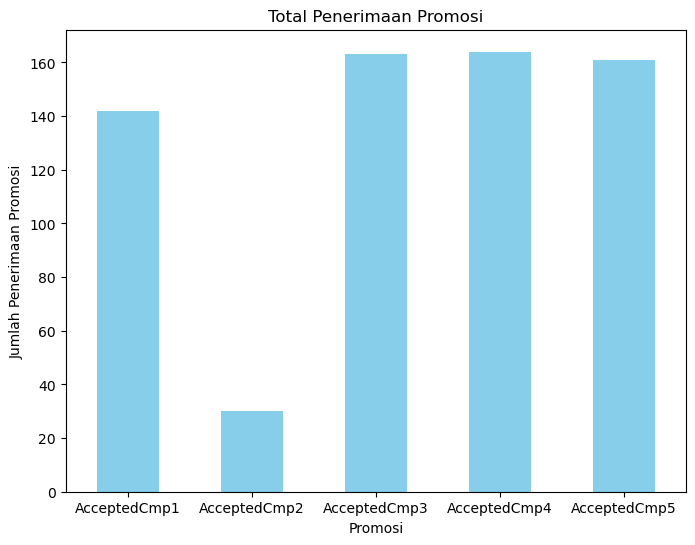

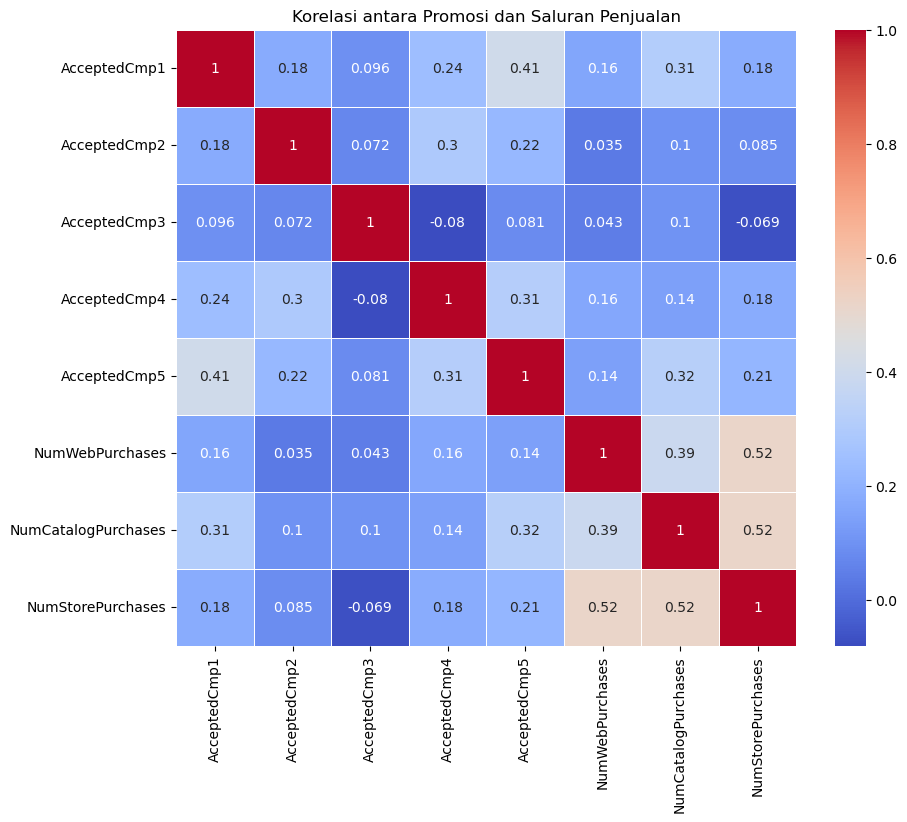

,NumWebPurchases,NumCatalogPurchases,NumStorePurchases
AcceptedCmp1,0.159100,0.309130,0.178462
AcceptedCmp2,0.034722,0.099931,0.085146
AcceptedCmp3,0.042685,0.104301,-0.069455
AcceptedCmp4,0.162722,0.140163,0.177705
AcceptedCmp5,0.141428,0.321522,0.214249


In [289]:
promotion_cols = ['AcceptedCmp1', 'AcceptedCmp2', 'AcceptedCmp3', 'AcceptedCmp4', 'AcceptedCmp5']

promotion_sums = df[promotion_cols].sum()
channel_sums = df[channel_cols].sum()

plt.figure(figsize=(8,6))
promotion_sums.plot(kind='bar', color='skyblue')
plt.title('Total Penerimaan Promosi')
plt.ylabel('Jumlah Penerimaan Promosi')
plt.xlabel('Promosi')
plt.xticks(rotation=0)
plt.show()

correlation_matrix = df[promotion_cols + channel_cols].corr()

plt.figure(figsize=(10,8))
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', linewidths=0.5)
plt.title('Korelasi antara Promosi dan Saluran Penjualan')
plt.show()

correlation_matrix[channel_cols].loc[promotion_cols]

Terdapat hubungan yang kuat antara penerimaan promosi dan saluran penjualan, terutama untuk pembelian melalui katalog, yang tampaknya menjadi saluran utama yang dioptimalkan oleh kampanye promosi, khususnya untuk promosi ke-5 dan ke-1.

##### **Hubungan antara Kepuasan Pelanggan dan Saluran Penjualan**

<Figure size 1000x600 with 0 Axes>

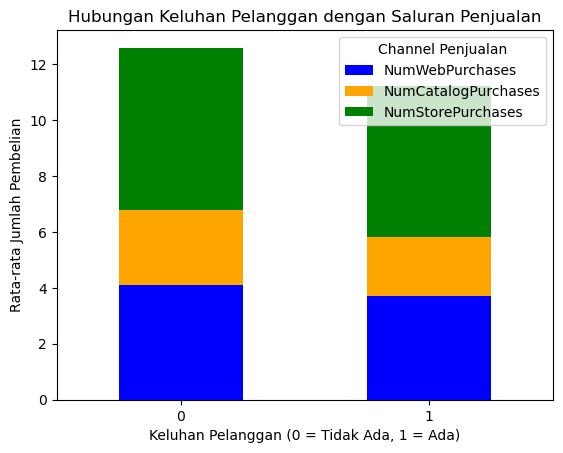

,NumWebPurchases,NumCatalogPurchases,NumStorePurchases
Complain,,,
0,4.091697,2.677464,5.810219
1,3.700000,2.100000,5.400000


In [290]:
complaint_analysis = df.groupby('Complain')[['NumWebPurchases', 'NumCatalogPurchases', 'NumStorePurchases']].mean()

plt.figure(figsize=(10,6))
complaint_analysis.plot(kind='bar', stacked=True, color=['blue', 'orange', 'green'])
plt.title('Hubungan Keluhan Pelanggan dengan Saluran Penjualan')
plt.ylabel('Rata-rata Jumlah Pembelian')
plt.xlabel('Keluhan Pelanggan (0 = Tidak Ada, 1 = Ada)')
plt.xticks(rotation=0)
plt.legend(title='Channel Penjualan')
plt.show()

complaint_analysis

Ada hubungan negatif antara keluhan pelanggan dan saluran penjualan: pelanggan yang mengeluh cenderung melakukan lebih sedikit pembelian di semua saluran, terutama di toko fisik dan web. Ini mungkin mengindikasikan bahwa pengalaman belanja yang tidak memuaskan dapat mengurangi loyalitas dan frekuensi pembelian pelanggan di masa depan.

##### **Hubungan Frekuensi Pembelian dengan Saluran Penjualan**

<Figure size 1000x600 with 0 Axes>

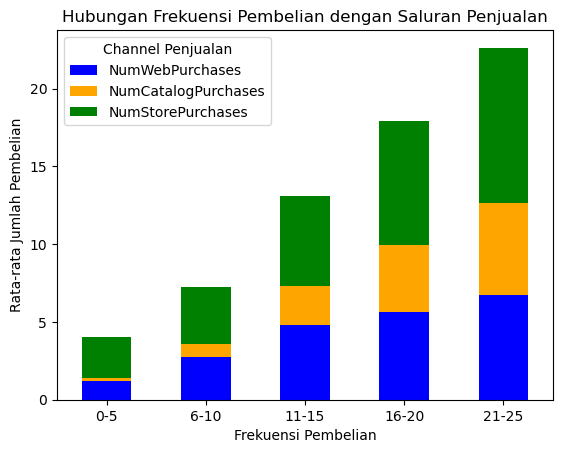

,NumWebPurchases,NumCatalogPurchases,NumStorePurchases
PurchaseFrequency,,,
0-5,1.200000,0.198058,2.623301
6-10,2.768398,0.835498,3.638528
11-15,4.786802,2.538071,5.794416
16-20,5.652838,4.307860,7.975983
21-25,6.735669,5.942675,9.955414


In [291]:
df['TotalPurchases'] = df['NumWebPurchases'] + df['NumCatalogPurchases'] + df['NumStorePurchases']

bins = [0, 5, 10, 15, 20, 25]
labels = ['0-5', '6-10', '11-15', '16-20', '21-25']
df['PurchaseFrequency'] = pd.cut(df['TotalPurchases'], bins=bins, labels=labels, include_lowest=True)

purchase_frequency_analysis = df.groupby('PurchaseFrequency')[['NumWebPurchases', 'NumCatalogPurchases', 'NumStorePurchases']].mean()

plt.figure(figsize=(10,6))
purchase_frequency_analysis.plot(kind='bar', stacked=True, color=['blue', 'orange', 'green'])
plt.title('Hubungan Frekuensi Pembelian dengan Saluran Penjualan')
plt.ylabel('Rata-rata Jumlah Pembelian')
plt.xlabel('Frekuensi Pembelian')
plt.xticks(rotation=0)
plt.legend(title='Channel Penjualan')
plt.show()

purchase_frequency_analysis

Terdapat hubungan yang jelas antara frekuensi pembelian dan saluran penjualan:
1. Toko fisik tetap menjadi saluran yang paling banyak digunakan di semua segmen frekuensi, tetapi pembelian melalui web dan katalog meningkat seiring dengan meningkatnya frekuensi pembelian.
2. Pelanggan yang lebih aktif cenderung menggunakan ketiga saluran penjualan lebih sering, terutama mereka yang melakukan lebih dari 15 pembelian secara total.

##### **Hubungan Loyalitas Pelanggan dengan Saluran Penjualan**

<Figure size 1000x600 with 0 Axes>

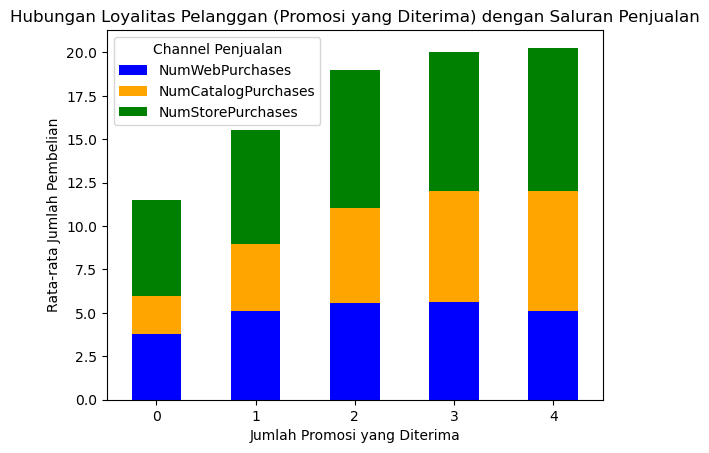

,NumWebPurchases,NumCatalogPurchases,NumStorePurchases
TotalAcceptedCmp,,,
0,3.790764,2.202965,5.496009
1,5.090062,3.866460,6.577640
2,5.580247,5.469136,7.962963
3,5.613636,6.431818,7.954545
4,5.090909,6.909091,8.272727


In [292]:
df['TotalAcceptedCmp'] = df[promotion_cols].sum(axis=1)
loyalty_analysis = df.groupby('TotalAcceptedCmp')[['NumWebPurchases', 'NumCatalogPurchases', 'NumStorePurchases']].mean()

plt.figure(figsize=(10,6))
loyalty_analysis.plot(kind='bar', stacked=True, color=['blue', 'orange', 'green'])
plt.title('Hubungan Loyalitas Pelanggan (Promosi yang Diterima) dengan Saluran Penjualan')
plt.ylabel('Rata-rata Jumlah Pembelian')
plt.xlabel('Jumlah Promosi yang Diterima')
plt.xticks(rotation=0)
plt.legend(title='Channel Penjualan')
plt.show()

loyalty_analysis

Terdapat hubungan yang kuat antara loyalitas pelanggan (berdasarkan jumlah promosi yang diterima) dan preferensi mereka terhadap saluran penjualan:
1. Katalog menjadi saluran yang paling dioptimalkan oleh pelanggan yang lebih loyal, dengan pembelian meningkat secara signifikan ketika lebih banyak promosi diterima.
2. Toko fisik masih menjadi saluran utama bagi semua pelanggan, tetapi kontribusi pembelian melalui katalog meningkat seiring dengan meningkatnya loyalitas pelanggan.

##### **Analisis Segmentasi Pelanggan berdasarkan Saluran Penjualan**

<Figure size 1000x600 with 0 Axes>

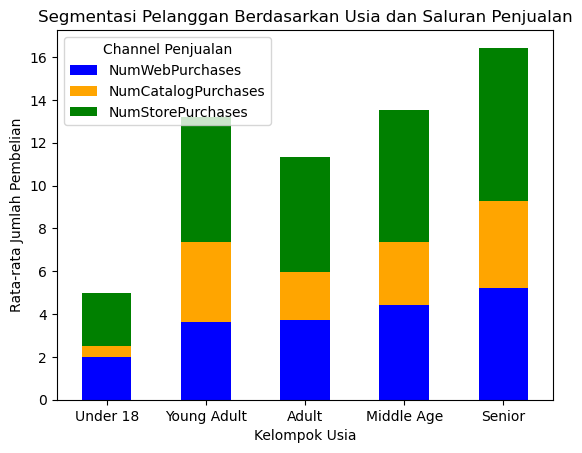

,NumWebPurchases,NumCatalogPurchases,NumStorePurchases
Age_Group,,,
Under 18,2.000000,0.500000,2.500000
Young Adult,3.644068,3.711864,5.864407
Adult,3.701835,2.266972,5.366055
Middle Age,4.433508,2.921466,6.164398
Senior,5.235849,4.056604,7.141509


In [293]:
age_segment_analysis = df.groupby('Age_Group')[['NumWebPurchases', 'NumCatalogPurchases', 'NumStorePurchases']].mean()

plt.figure(figsize=(10,6))
age_segment_analysis.plot(kind='bar', stacked=True, color=['blue', 'orange', 'green'])
plt.title('Segmentasi Pelanggan Berdasarkan Usia dan Saluran Penjualan')
plt.ylabel('Rata-rata Jumlah Pembelian')
plt.xlabel('Kelompok Usia')
plt.xticks(rotation=0)
plt.legend(title='Channel Penjualan')
plt.show()

age_segment_analysis

Terdapat hubungan yang kuat antara kelompok usia dan saluran penjualan:
1. Toko fisik tetap menjadi saluran utama di semua kelompok usia, terutama bagi pelanggan yang lebih muda.
2. Pembelian melalui web dan katalog lebih populer di kalangan pelanggan yang lebih tua, terutama pada usia di atas 60 tahun, yang mungkin lebih mengandalkan kenyamanan belanja online atau melalui katalog.

<Figure size 1000x600 with 0 Axes>

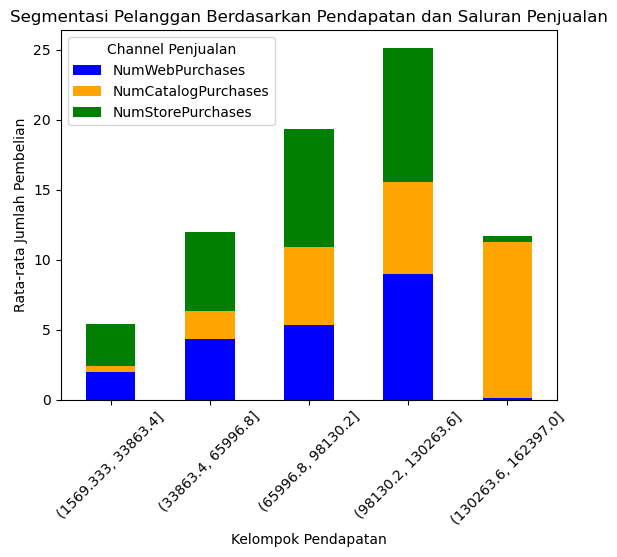

,NumWebPurchases,NumCatalogPurchases,NumStorePurchases
Income_Group,,,
"(1569.333, 33863.4]",1.980000,0.460000,2.942000
"(33863.4, 65996.8]",4.328413,1.994465,5.639299
"(65996.8, 98130.2]",5.369707,5.529316,8.452769
"(98130.2, 130263.6]",9.000000,6.571429,9.571429
"(130263.6, 162397.0]",0.142857,11.142857,0.428571


In [294]:
income_segment_analysis = df.groupby('Income_Group')[['NumWebPurchases', 'NumCatalogPurchases', 'NumStorePurchases']].mean()

plt.figure(figsize=(10,6))
income_segment_analysis.plot(kind='bar', stacked=True, color=['blue', 'orange', 'green'])
plt.title('Segmentasi Pelanggan Berdasarkan Pendapatan dan Saluran Penjualan')
plt.ylabel('Rata-rata Jumlah Pembelian')
plt.xlabel('Kelompok Pendapatan')
plt.xticks(rotation=45)
plt.legend(title='Channel Penjualan')
plt.show()

income_segment_analysis

<Figure size 1000x600 with 0 Axes>

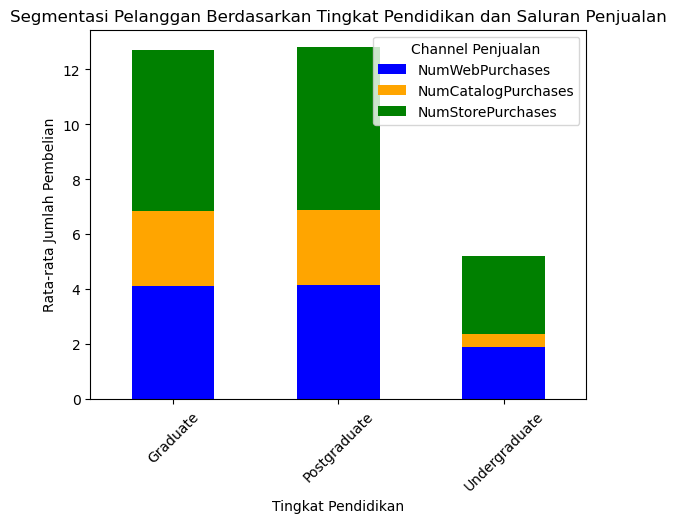

,NumWebPurchases,NumCatalogPurchases,NumStorePurchases
Education,,,
Graduate,4.116592,2.739910,5.843946
Postgraduate,4.171620,2.713327,5.919463
Undergraduate,1.888889,0.481481,2.851852


In [295]:
education_segment_analysis = df.groupby('Education')[['NumWebPurchases', 'NumCatalogPurchases', 'NumStorePurchases']].mean()

plt.figure(figsize=(10,6))
education_segment_analysis.plot(kind='bar', stacked=True, color=['blue', 'orange', 'green'])
plt.title('Segmentasi Pelanggan Berdasarkan Tingkat Pendidikan dan Saluran Penjualan')
plt.ylabel('Rata-rata Jumlah Pembelian')
plt.xlabel('Tingkat Pendidikan')
plt.xticks(rotation=45)
plt.legend(title='Channel Penjualan')
plt.show()

education_segment_analysis

1. **Pelanggan dengan Pendidikan *Undergraduate*:**
    - Pelanggan dengan tingkat pendidikan Basic memiliki frekuensi pembelian yang paling rendah di semua saluran, dengan rata-rata pembelian tertinggi di toko fisik (2,85) dan lebih sedikit pembelian melalui web (1,89) dan katalog (0,48). Ini menunjukkan bahwa mereka cenderung lebih memilih berbelanja langsung di toko fisik.

2. **Pelanggan dengan Pendidikan *Graduate*:**
    - Pelanggan di tingkat pendidikan 2nd Cycle menunjukkan preferensi yang lebih seimbang, dengan pembelian melalui toko fisik (5,84) dan pembelian web (4,11). Pembelian melalui katalog tetap rendah (2,73), namun lebih tinggi dibandingkan pelanggan dengan pendidikan dasar.
3. **Pelanggan dengan Pendidikan *Postgraduate*:**
    - Pelanggan dengan gelar Master, 2nd Cycle, dan PhD lebih sering melakukan pembelian melalui semua saluran, dengan rata-rata pembelian tertinggi di toko fisik untuk setiap kelompok pendidikan.

Terdapat hubungan yang jelas antara tingkat pendidikan dan saluran penjualan:
- Pelanggan dengan pendidikan lebih tinggi cenderung lebih aktif di semua saluran penjualan, terutama di web dan katalog, selain tetap menjadikan toko fisik sebagai saluran utama.
- Pelanggan dengan pendidikan dasar lebih cenderung berbelanja di toko fisik, dengan pembelian melalui web dan katalog yang jauh lebih rendah.

##### **Analisis Hubungan Recency (Keterbaruan Interaksi) dengan Saluran Penjualan**

<Figure size 1000x600 with 0 Axes>

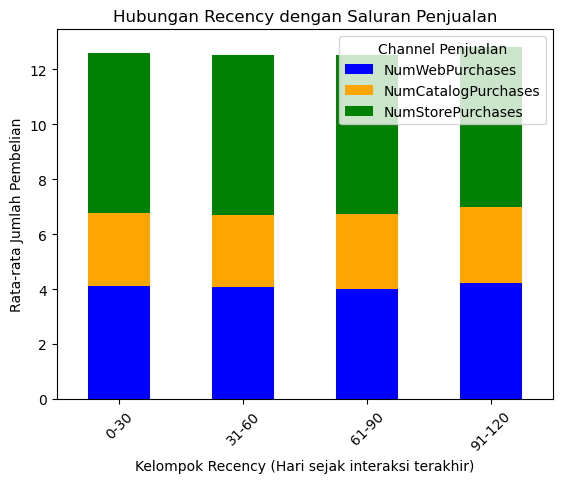

,NumWebPurchases,NumCatalogPurchases,NumStorePurchases
Recency_Group,,,
0-30,4.111919,2.642442,5.844477
31-60,4.068006,2.630603,5.822257
61-90,4.015267,2.722137,5.774046
91-120,4.206186,2.793814,5.809278


In [296]:
recency_bins = [0, 30, 60, 90, 120]
recency_labels = ['0-30', '31-60', '61-90', '91-120']
df['Recency_Group'] = pd.cut(df['Recency'], bins=recency_bins, labels=recency_labels)

recency_segment_analysis = df.groupby('Recency_Group')[['NumWebPurchases', 'NumCatalogPurchases', 'NumStorePurchases']].mean()

plt.figure(figsize=(10,6))
recency_segment_analysis.plot(kind='bar', stacked=True, color=['blue', 'orange', 'green'])
plt.title('Hubungan Recency dengan Saluran Penjualan')
plt.ylabel('Rata-rata Jumlah Pembelian')
plt.xlabel('Kelompok Recency (Hari sejak interaksi terakhir)')
plt.xticks(rotation=45)
plt.legend(title='Channel Penjualan')
plt.show()

recency_segment_analysis

1. **Kelompok dengan Interaksi Terbaru (0-30 hari):**
    - Pelanggan yang baru-baru ini berinteraksi dengan brand (0-30 hari) lebih banyak melakukan pembelian melalui toko fisik (5,84) dibandingkan web (4,11) dan katalog (2,64). Ini menunjukkan bahwa pelanggan yang masih terhubung secara aktif cenderung berbelanja langsung di toko fisik.
2. **Kelompok dengan Interaksi 31-120 Hari:**
    - Dalam rentang 31-120 hari, rata-rata pembelian tetap cukup stabil di semua saluran. Pembelian melalui web dan katalog sedikit lebih rendah dibandingkan toko fisik, dengan pembelian toko fisik tetap mendominasi.
    - Pada rentang 91-120 hari, pembelian melalui katalog sedikit meningkat, dengan rata-rata 2,79 pembelian, meskipun toko fisik tetap dominan.

Terdapat hubungan yang jelas antara recency dan saluran penjualan:
- Pelanggan yang baru-baru ini berinteraksi cenderung lebih banyak menggunakan toko fisik untuk pembelian mereka.
- Pembelian melalui katalog cenderung sedikit meningkat pada pelanggan dengan interaksi antara 91-120 hari, namun tetap lebih rendah dibandingkan toko fisik.

##### **Analisis Hubungan Jumlah Kunjungan Web Bulanan dengan Saluran Penjualan**

<Figure size 1000x600 with 0 Axes>

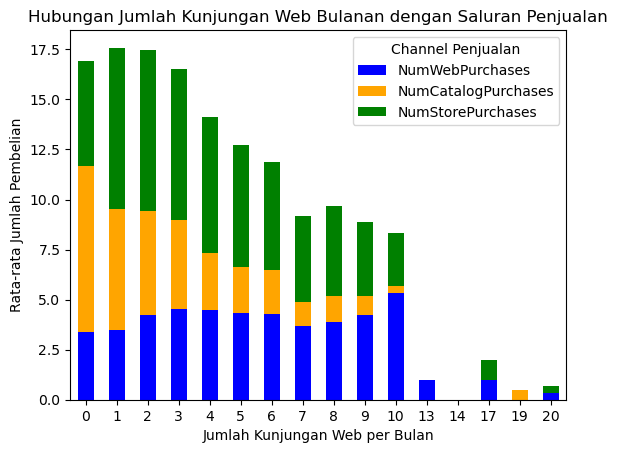

,NumWebPurchases,NumCatalogPurchases,NumStorePurchases
NumWebVisitsMonth,,,
0,3.400000,8.300000,5.200000
1,3.489933,6.060403,8.033557
2,4.238806,5.203980,8.039801
3,4.507389,4.467980,7.536946
4,4.500000,2.851852,6.763889
5,4.338129,2.298561,6.082734
6,4.287425,2.191617,5.380240
7,3.666667,1.232558,4.281654
8,3.897059,1.264706,4.494118


In [297]:
web_visits_segment_analysis = df.groupby('NumWebVisitsMonth')[['NumWebPurchases', 'NumCatalogPurchases', 'NumStorePurchases']].mean()

plt.figure(figsize=(10,6))
web_visits_segment_analysis.plot(kind='bar', stacked=True, color=['blue', 'orange', 'green'])
plt.title('Hubungan Jumlah Kunjungan Web Bulanan dengan Saluran Penjualan')
plt.ylabel('Rata-rata Jumlah Pembelian')
plt.xlabel('Jumlah Kunjungan Web per Bulan')
plt.xticks(rotation=0)
plt.legend(title='Channel Penjualan')
plt.show()

web_visits_segment_analysis


1. **Pelanggan dengan 1-4 Kunjungan Web per Bulan:**
    - Pelanggan yang mengunjungi situs web 1-4 kali dalam sebulan cenderung melakukan pembelian yang lebih banyak melalui toko fisik. Pada tingkat kunjungan web ini, rata-rata pembelian melalui toko fisik mencapai puncaknya di 8,04 untuk pelanggan dengan 2 kunjungan, dan sedikit lebih rendah pada kunjungan ke-3 dan ke-4.
    - Pembelian melalui web juga meningkat pada kunjungan ke-2 dan ke-3, namun mulai menurun setelah itu.
2. **Pelanggan dengan 5-10 Kunjungan Web per Bulan:**
    - Katalog mulai kehilangan pengaruh pada kelompok ini, dengan pembelian melalui katalog turun menjadi 2,29 pada kunjungan web ke-5 dan terus menurun pada kunjungan lebih tinggi.
3. **Pelanggan dengan Kunjungan Tinggi (di atas 10 kali per bulan):**
    - Pada kunjungan yang lebih tinggi, seperti lebih dari 10 kali, terdapat tren penurunan yang signifikan dalam pembelian melalui semua saluran. Ini mungkin menandakan bahwa meskipun pelanggan mengunjungi situs web sering, mereka tidak selalu melakukan transaksi, atau mereka lebih mungkin mencari informasi daripada berbelanja.

Terdapat hubungan antara jumlah kunjungan web dan preferensi saluran penjualan:
- Pelanggan dengan kunjungan web rendah hingga sedang (1-4 kunjungan) cenderung lebih sering berbelanja melalui toko fisik.
- Pelanggan dengan kunjungan web lebih sering (9-10 kunjungan) lebih aktif berbelanja melalui web, sementara pembelian melalui katalog menurun secara signifikan.
- Kunjungan web yang sangat tinggi (di atas 10 kali) tampaknya tidak menghasilkan pembelian yang signifikan di semua saluran.

##### **Analisis Hubungan Respon terhadap Kampanye dengan Saluran Penjualan**

<Figure size 1000x600 with 0 Axes>

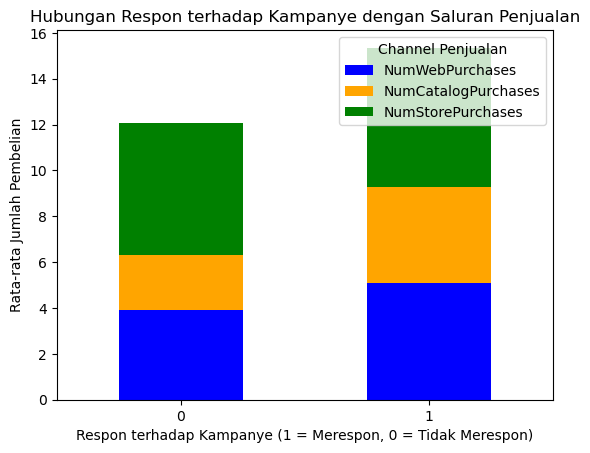

,NumWebPurchases,NumCatalogPurchases,NumStorePurchases
Response,,,
0,3.913784,2.401277,5.757850
1,5.072072,4.201201,6.081081


In [298]:
response_segment_analysis = df.groupby('Response')[['NumWebPurchases', 'NumCatalogPurchases', 'NumStorePurchases']].mean()

plt.figure(figsize=(10,6))
response_segment_analysis.plot(kind='bar', stacked=True, color=['blue', 'orange', 'green'])
plt.title('Hubungan Respon terhadap Kampanye dengan Saluran Penjualan')
plt.ylabel('Rata-rata Jumlah Pembelian')
plt.xlabel('Respon terhadap Kampanye (1 = Merespon, 0 = Tidak Merespon)')
plt.xticks(rotation=0)
plt.legend(title='Channel Penjualan')
plt.show()

response_segment_analysis

1. **Pelanggan yang Tidak Merespon Kampanye (Response = 0):**
    - Pelanggan yang tidak merespon kampanye pemasaran cenderung melakukan pembelian lebih sedikit di semua saluran. Rata-rata pembelian tertinggi masih terjadi di toko fisik (5,75), diikuti oleh web (3,91) dan katalog (2,40).
2. **Pelanggan yang Merespon Kampanye (Response = 1):**
    - Pelanggan yang merespon kampanye pemasaran menunjukkan peningkatan signifikan dalam pembelian di semua saluran. Rata-rata pembelian melalui katalog naik secara drastis menjadi 4,20, lebih tinggi dibandingkan mereka yang tidak merespon.Pembelian melalui web juga meningkat menjadi 5,07, dan pembelian di toko fisik sedikit lebih tinggi di 6,08.

Adanya hubungan yang kuat antara respon terhadap kampanye dan saluran penjualan:
- Pelanggan yang merespon kampanye pemasaran lebih cenderung berbelanja melalui semua saluran, terutama melalui katalog dan web.
- Pelanggan yang tidak merespon kampanye masih lebih banyak berbelanja di toko fisik, tetapi dengan intensitas pembelian yang lebih rendah di semua saluran dibandingkan dengan mereka yang merespon.

Ini menunjukkan bahwa kampanye pemasaran memiliki dampak positif pada aktivitas pembelian di semua saluran, terutama dalam mendorong pembelian melalui katalog dan web.

Berdasarkan berbagai analisis yang telah dilakukan, berikut adalah *insight* dan rekomendasi berdasarkan temuan tentang preferensi pelanggan terhadap saluran penjualan, kontribusi saluran terhadap penjualan keseluruhan, hubungan promosi, loyalitas pelanggan, serta demografi yang memengaruhi saluran penjualan.

**Insight Utama dari Analisis**
1. **Preferensi Saluran Penjualan:**
    - Toko fisik tetap menjadi saluran yang paling banyak digunakan oleh berbagai kelompok pelanggan, terutama untuk produk sehari-hari seperti daging, ikan, dan produk manis.
    - Pembelian melalui web cenderung lebih tinggi pada produk dengan nilai lebih tinggi seperti anggur dan emas, yang sering dibeli oleh pelanggan yang lebih muda atau berpendidikan tinggi.
    - Katalog masih relevan untuk menjual produk bernilai tinggi, tetapi lebih efektif untuk pelanggan yang lebih loyal dan merespon kampanye promosi.

2. **Kontribusi Saluran terhadap Total Penjualan:**
    - Toko fisik memberikan kontribusi terbesar terhadap penjualan keseluruhan, diikuti oleh web, dan katalog menjadi saluran dengan kontribusi yang lebih kecil namun signifikan, terutama bagi produk premium dan pelanggan yang terlibat dalam promosi.

3. **Demografi dan Saluran Penjualan:**
    - Pelanggan usia muda (18-30 tahun) dan berpendapatan rendah hingga menengah cenderung melakukan lebih banyak pembelian melalui toko fisik, namun tetap terbuka untuk pembelian web.
    - Pelanggan berusia lebih tua (50+ tahun) lebih nyaman melakukan pembelian melalui web dan katalog, dengan preferensi yang lebih besar terhadap katalog pada kelompok pendapatan menengah-tinggi.

4. **Pengaruh Kampanye Promosi dan Loyalitas:**
    - Pelanggan yang merespon kampanye promosi cenderung meningkatkan aktivitas pembelian mereka di semua saluran, dengan katalog menjadi saluran yang paling dioptimalkan setelah kampanye berhasil.
    - Loyalitas pelanggan berbanding lurus dengan peningkatan penggunaan semua saluran, terutama web dan katalog. Promosi yang diterima meningkatkan engagement pelanggan terhadap berbagai saluran.

5. **Frekuensi Kunjungan Web dan Gap Transaksi:**
    - Meskipun kunjungan web tinggi (5-10 kali per bulan) meningkatkan pembelian web, terlalu banyak kunjungan (lebih dari 10 kali) tampaknya tidak selalu berbanding lurus dengan peningkatan transaksi. Pelanggan cenderung mencari informasi tanpa melakukan pembelian pada tingkat kunjungan web yang sangat tinggi.

***Actionable Recommendations* untuk Stakeholder**
1. **Tim Pemasaran dan Penjualan:**
    - Optimalkan strategi promosi berbasis katalog untuk produk bernilai tinggi (misalnya, anggur dan emas). Kampanye promosi yang berfokus pada katalog memiliki efek positif dalam meningkatkan penjualan di saluran ini, terutama untuk pelanggan berpendapatan menengah-tinggi.
    - Fokus pada pelanggan yang merespon promosi untuk memperluas penggunaan saluran penjualan web dan katalog. Promosi tambahan yang tepat sasaran akan mendorong lebih banyak transaksi melalui dua saluran ini.

2. **Tim E-Commerce:**
    - Maksimalkan pengalaman belanja online dengan memberikan penawaran eksklusif atau diskon untuk produk bernilai tinggi. Pelanggan yang lebih muda dan berpendidikan tinggi lebih cenderung menggunakan web untuk transaksi.
    - *Redesign* User Experience (UX) untuk pelanggan dengan kunjungan web tinggi tapi tanpa transaksi (lebih dari 10 kali per bulan). Perbaiki alur belanja agar lebih memudahkan konversi dari kunjungan menjadi transaksi.

3. **Tim Pengembangan Produk:**
    - Tingkatkan personalisasi dalam katalog berdasarkan preferensi produk dan kebiasaan belanja pelanggan. Katalog yang dipersonalisasi dapat lebih menarik perhatian pelanggan berpendapatan tinggi dan yang merespon promosi.

4. **Manajemen Toko Fisik:**
    - Pertahankan keunggulan toko fisik sebagai saluran penjualan utama dengan memberikan pengalaman belanja yang lebih interaktif dan customer-centric. Pelanggan masih mengandalkan toko fisik untuk pembelian produk sehari-hari.

5. **Tim Analitik dan CRM:**
    - Monitor *recency* untuk mengidentifikasi pelanggan yang telah lama tidak bertransaksi (lebih dari 120 hari). Kirimkan kampanye yang relevan untuk menarik mereka kembali ke saluran web atau toko fisik.
    - Gunakan data frekuensi pembelian untuk memberikan penawaran yang lebih personal kepada pelanggan berdasarkan saluran yang paling sering mereka gunakan.

##### **Kesimpulan**

1. **Saluran yang paling banyak digunakan:** Toko fisik adalah saluran penjualan utama, terutama untuk produk sehari-hari. Namun, web dan katalog memiliki peran penting untuk produk bernilai tinggi dan pelanggan yang loyal.
2. **Kontribusi terbesar terhadap total penjualan:** Toko fisik berkontribusi paling besar, tetapi kampanye promosi mampu mendorong penjualan yang signifikan melalui web dan katalog.
3. **Frekuensi kunjungan dan gap transaksi:** Pelanggan dengan kunjungan web tinggi (lebih dari 10 kali) tidak selalu bertransaksi, menunjukkan perlunya perbaikan dalam alur konversi di situs web.
4. **Cara mengoptimalkan saluran yang kurang efektif:** Meningkatkan penawaran promosi eksklusif dan pengalaman belanja personal di katalog dapat membantu meningkatkan minat terhadap saluran ini.

Dengan mengikuti rekomendasi ini, stakeholder dapat lebih mengoptimalkan setiap saluran penjualan berdasarkan karakteristik dan perilaku pelanggan, sehingga mampu mendorong pertumbuhan penjualan yang lebih efektif di masa mendatang.